In [1]:
# 필요한 라이브러리
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tree = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\tree.csv")
house = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\house.csv")
man = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\man.csv")
woman = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\woman.csv")

In [3]:
tree.head()

,tree_h,tree_w,trunk_h,trunk_w,branch_h,branch_w,leaf_h,leaf_w,crown_h,crown_w,root_h,root_w
0,1206,931,527,394,383,633,105,75,640,925,184,693
1,756,468,367,228,223,297,119,48,389,462,80,174
2,1111,548,599,168,131,319,80,147,95,118,309,297
3,864,410,415,271,48,160,117,113,71,55,97,361
4,1261,922,834,556,51,75,69,37,307,319,174,591


In [4]:
# house에서 지붕, 문, 사이즈 비교
house['roof_size'] = house['roof_h']*house['roof_w']

house['door_size'] = house['door_h']*house['door_w']

house['window_size'] = house['window_h']*house['window_w']

house['house_size'] = house['house_h']*house['house_w']

In [5]:
# house 결측치 제거

house = house[:11200]

#### dict 만들어서, 이상치 제거한 값의 평균들을 다 저장.

In [6]:
mean=dict()

#### 박스 플롯 함수

In [7]:
def box_plot(data, name, col):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=data, x=data[col])

    np_arr = np.array(data[col])
    
    q1 = np.percentile(np_arr, 25)
    q3 = np.percentile(np_arr, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [x for x in data[col] if x < lower_bound or x > upper_bound]
    
    inliners = [x for x in data[col] if x >= lower_bound and x <= upper_bound]
    inliners = np.array(inliners)
    
    if name=='man':
        cols = col+'_man'
        mean[cols] = inliners.mean()
    elif name=='woman':
        cols = col+'_woman'
        mean[cols] = inliners.mean()
    else:
        mean[col] = inliners.mean()
    
    
    print("이상치 개수:", len(outliers))
    print('이상치 제거한 데이터의 평균값:', inliners.mean())
    print('본래 데이터의 평균값:', data[col].mean())

-----------------------
## 집 통계량

-----------------------

### 집

이상치 개수: 114
이상치 제거한 데이터의 평균값: 612.1187082807144
본래 데이터의 평균값: 618.4302678571429
이상치 개수: 145
이상치 제거한 데이터의 평균값: 512.951605608322
본래 데이터의 평균값: 520.6528571428571
이상치 개수: 322
이상치 제거한 데이터의 평균값: 330431.0343813201
본래 데이터의 평균값: 350866.76508928573


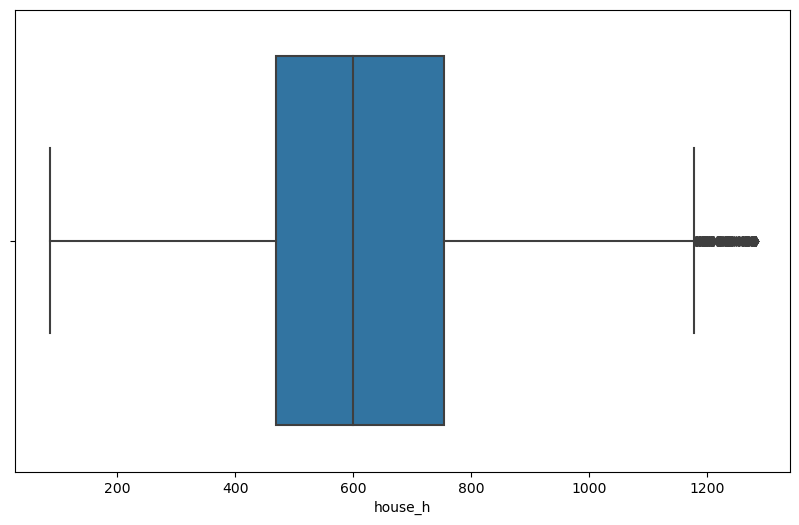

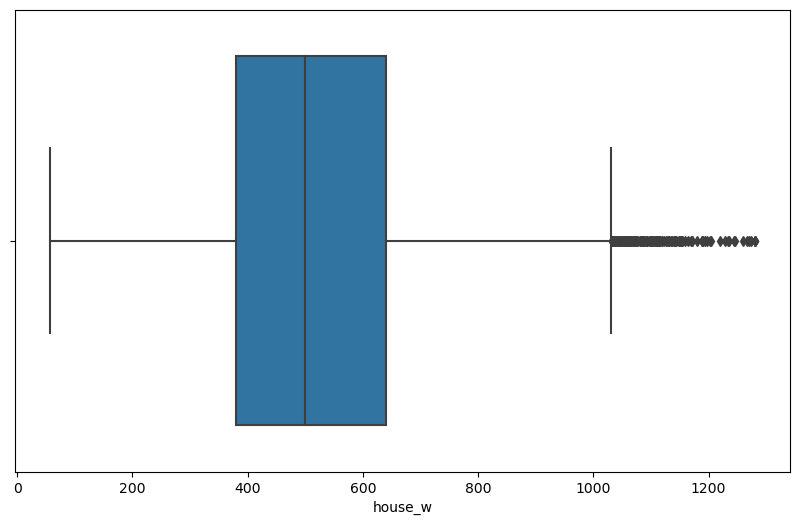

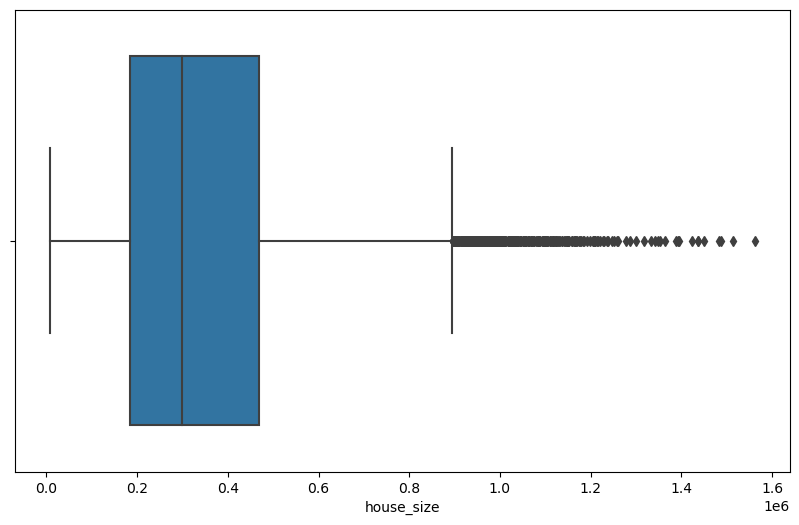

In [60]:
box_plot(house, 'house', 'house_h')
box_plot(house, 'house', 'house_w')
box_plot(house, 'house', 'house_size')

### 지붕

이상치 개수: 177
이상치 제거한 데이터의 평균값: 264.25038555747074
본래 데이터의 평균값: 269.4449107142857
이상치 개수: 156
이상치 제거한 데이터의 평균값: 488.2222926475915
본래 데이터의 평균값: 496.46535714285716
이상치 개수: 452
이상치 제거한 데이터의 평균값: 132887.877465575
본래 데이터의 평균값: 145596.17410714287


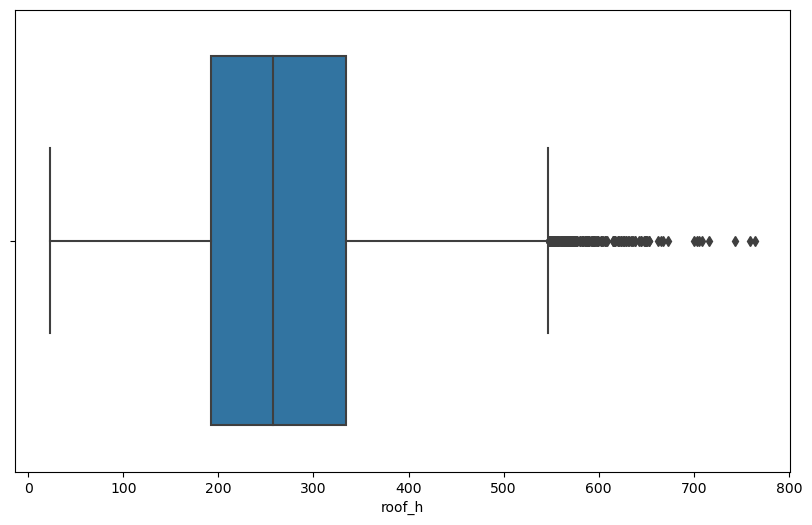

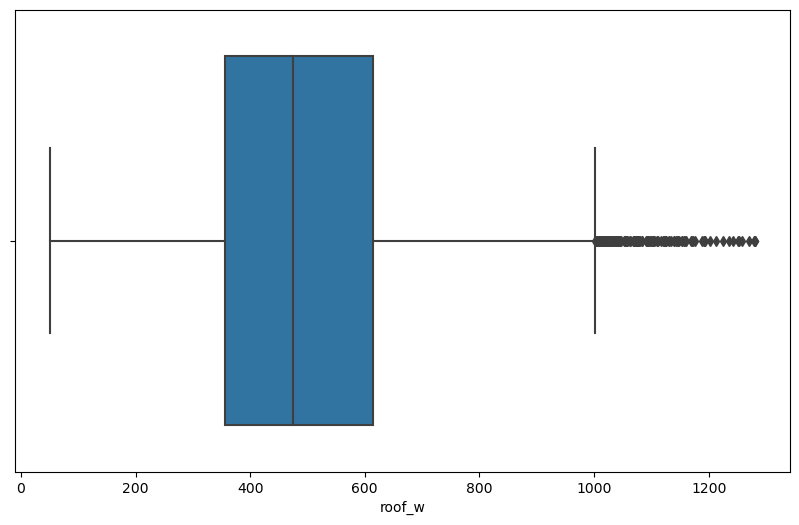

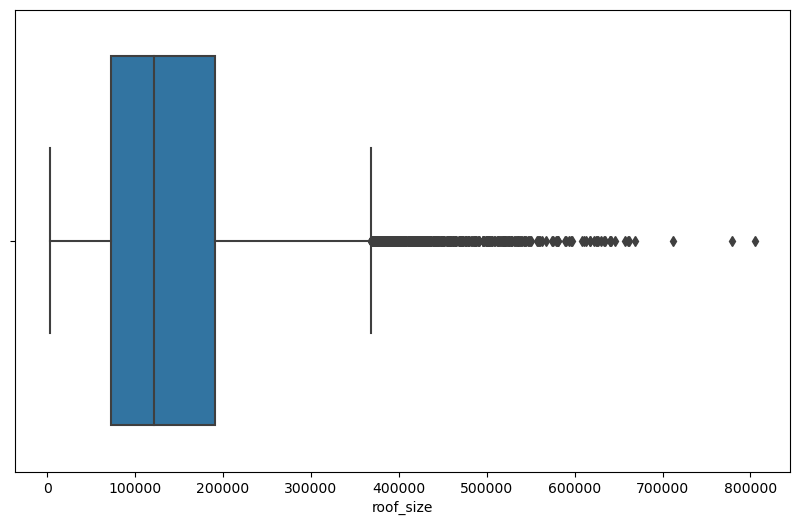

In [61]:
box_plot(house, 'house', 'roof_h')
box_plot(house, 'house', 'roof_w')
box_plot(house, 'house', 'roof_size')

### 문

이상치 개수: 280
이상치 제거한 데이터의 평균값: 175.60347985347985
본래 데이터의 평균값: 182.1194642857143
이상치 개수: 303
이상치 제거한 데이터의 평균값: 117.36064972010645
본래 데이터의 평균값: 122.499375
이상치 개수: 598
이상치 제거한 데이터의 평균값: 21818.83220147142
본래 데이터의 평균값: 25807.4425


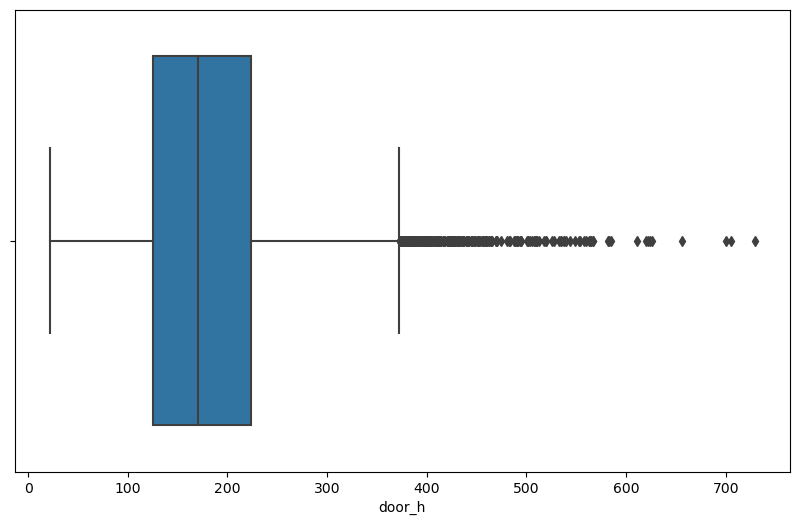

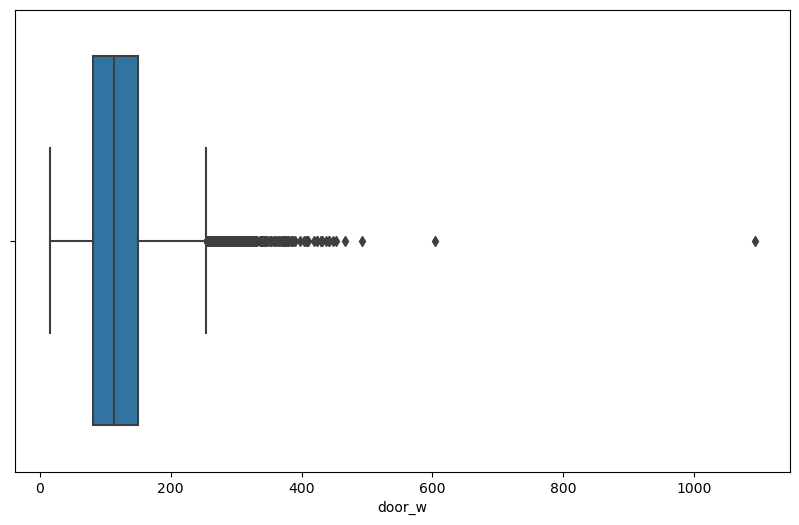

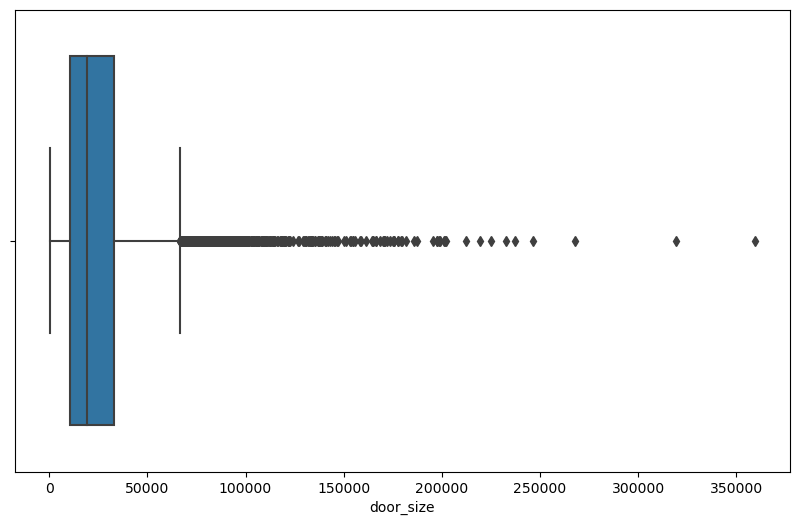

In [62]:
box_plot(house, 'house', 'door_h')
box_plot(house, 'house', 'door_w')
box_plot(house, 'house', 'door_size')

### 창문

이상치 개수: 309
이상치 제거한 데이터의 평균값: 95.22679276466808
본래 데이터의 평균값: 99.50357142857143
이상치 개수: 415
이상치 제거한 데이터의 평균값: 98.52220676866018
본래 데이터의 평균값: 106.00669642857143
이상치 개수: 700
이상치 제거한 데이터의 평균값: 9993.895333333334
본래 데이터의 평균값: 12635.18267857143


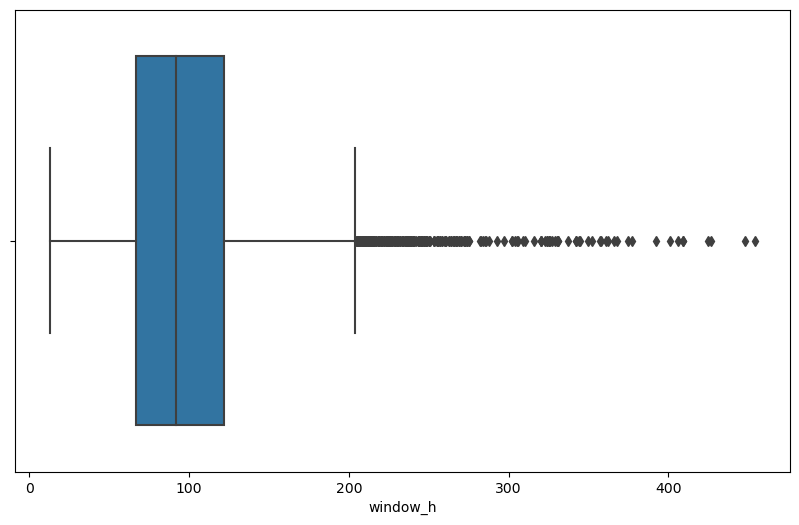

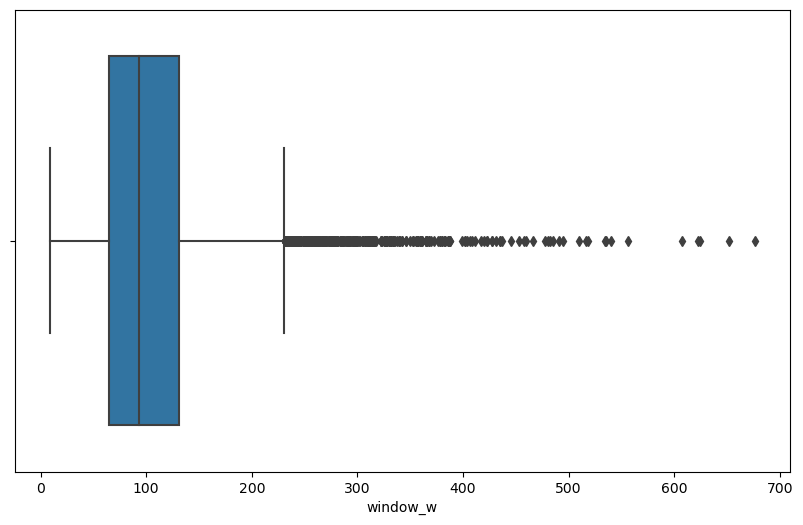

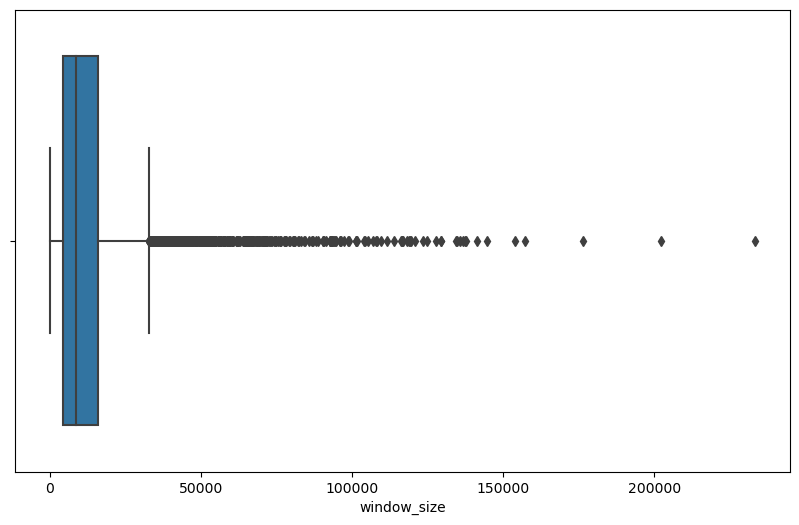

In [63]:
box_plot(house, 'house', 'window_h')
box_plot(house, 'house', 'window_w')
box_plot(house, 'house', 'window_size')

In [64]:
house.describe()

,roof_h,roof_w,door_h,door_w,window_h,window_w,house_h,house_w,roof_size,door_size,window_size,house_size
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,1.120000e+04
mean,269.444911,496.465357,182.119464,122.499375,99.503571,106.006696,618.430268,520.652857,145596.174107,25807.442500,12635.182679,3.508668e+05
std,106.335516,196.145528,80.260024,56.998259,46.140522,59.933037,211.880296,196.722018,101065.219612,23563.702352,13870.718744,2.259276e+05
min,23.000000,51.000000,22.000000,16.000000,13.000000,9.000000,86.000000,57.000000,3159.000000,400.000000,117.000000,7.992000e+03
25%,192.000000,356.000000,125.000000,82.000000,67.000000,65.000000,469.000000,379.000000,73006.000000,10645.250000,4553.000000,1.849175e+05
50%,257.000000,474.000000,170.000000,113.000000,92.000000,93.000000,600.000000,499.000000,121635.000000,19298.000000,8613.000000,2.998700e+05
75%,334.000000,614.000000,224.000000,151.000000,122.000000,131.000000,753.250000,640.000000,191004.000000,33013.250000,15872.000000,4.689315e+05
max,764.000000,1280.000000,729.000000,1092.000000,454.000000,676.000000,1280.000000,1280.000000,804784.000000,359397.000000,233250.000000,1.561600e+06


In [32]:
woman.rename(columns={'shoes_w': 'shoes1_w'}, inplace=True)
man.rename(columns={'shoes_w': 'shoes1_w'}, inplace=True)

In [14]:
## 얼굴과 눈, 귀, 코의 사이즈가 비교되어야 함으로...

man['face_size'] = man.face_h * man.face_w
man['ear_size'] = man.ear_h * man.ear_w
man['eye_size'] = man.eye_h * man.eye_w
man['nose_size'] = man.nose_h * man.nose_w
man['body_size'] = man.body_h * man.body_w
man['neck_size'] = man.neck_h * man.neck_w
man['arm_size'] = man.arm_h * man.arm_w
man['hand_size'] = man.hand_h * man.hand_w
man['mouth_size'] = man.mouth_h * man.mouth_w

woman['face_size'] = woman.face_h * woman.face_w
woman['ear_size'] = woman.ear_h * woman.ear_w
woman['eye_size'] = woman.eye_h * woman.eye_w
woman['nose_size'] = woman.nose_h * woman.nose_w
woman['body_size'] = woman.body_h * woman.body_w
woman['neck_size'] = woman.neck_h * woman.neck_w
woman['arm_size'] = woman.arm_h * woman.arm_w
woman['hand_size'] = woman.hand_h * woman.hand_w
woman['mouth_size'] = woman.mouth_h * woman.mouth_w

-----------------------
## 남자 통계량

-----------------------

### 몸

이상치 개수: 0
이상치 제거한 데이터의 평균값: 811.64625
본래 데이터의 평균값: 811.64625
이상치 개수: 268
이상치 제거한 데이터의 평균값: 410.29061470911086
본래 데이터의 평균값: 422.78982142857143
이상치 개수: 305
이상치 제거한 데이터의 평균값: 347919.7804497476
본래 데이터의 평균값: 366930.4100892857


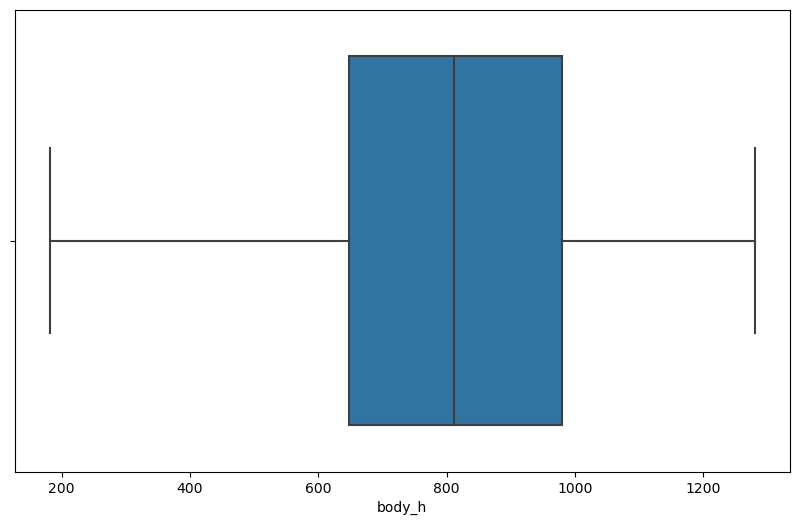

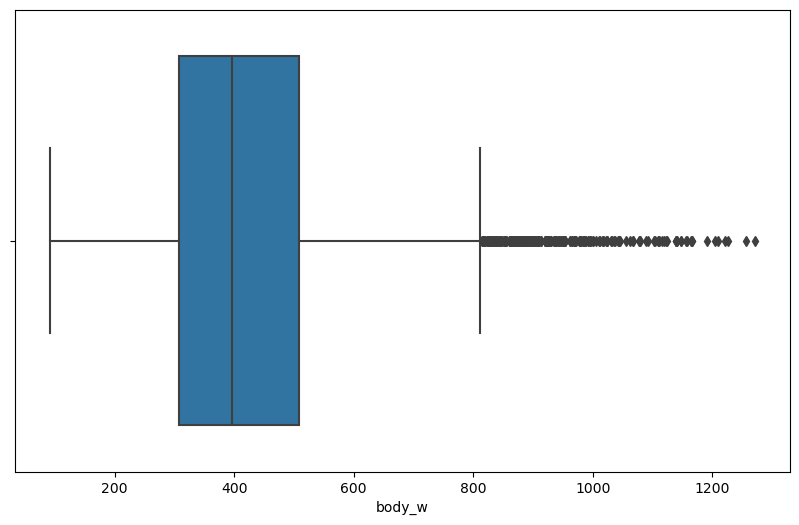

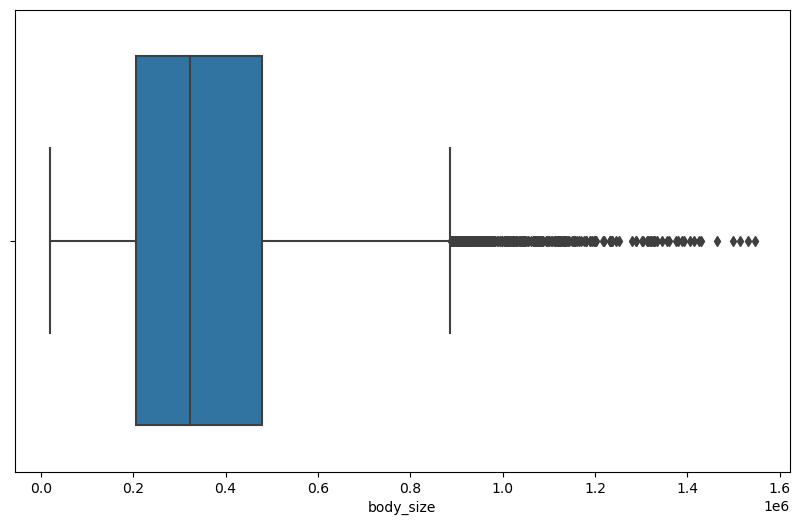

In [15]:
box_plot(man, 'man', 'body_h')
box_plot(man, 'man', 'body_w')
box_plot(man, 'man', 'body_size')

### 얼굴

이상치 개수: 392
이상치 제거한 데이터의 평균값: 151.17773871206515
본래 데이터의 평균값: 158.74223214285715
이상치 개수: 361
이상치 제거한 데이터의 평균값: 270.49183504013286
본래 데이터의 평균값: 282.55571428571426
이상치 개수: 726
이상치 제거한 데이터의 평균값: 42139.88514416651
본래 데이터의 평균값: 51365.712857142855


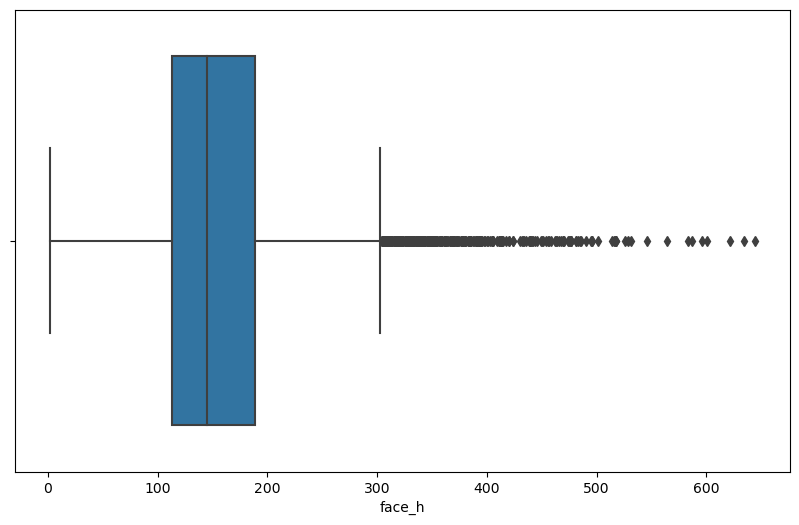

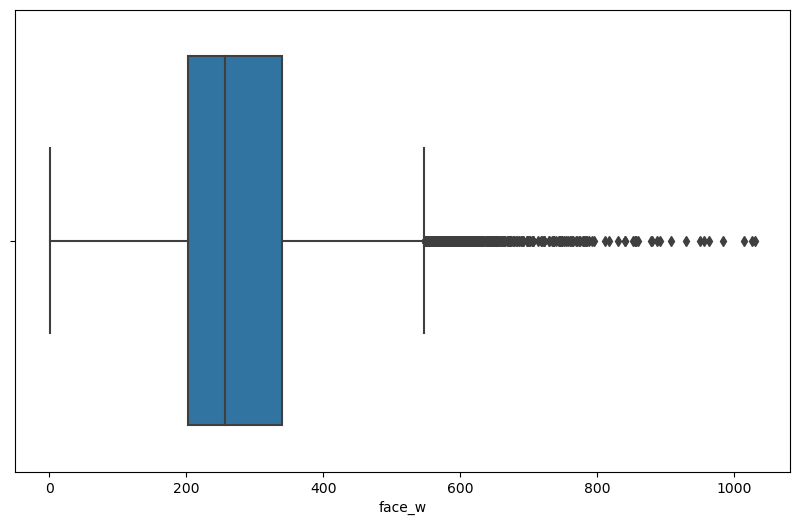

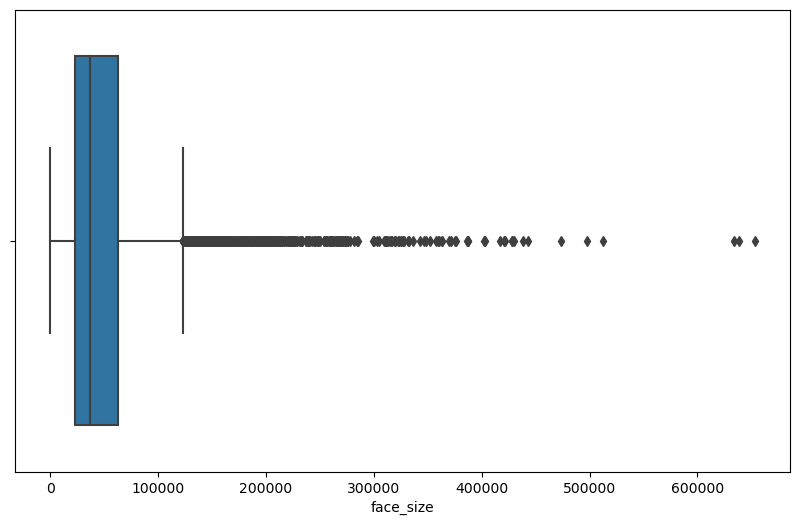

In [16]:
box_plot(man, 'man', 'face_h')
box_plot(man, 'man', 'face_w')
box_plot(man, 'man', 'face_size')

### 눈

이상치 개수: 440
이상치 제거한 데이터의 평균값: 32.746375464684014
본래 데이터의 평균값: 35.380267857142854
이상치 개수: 379
이상치 제거한 데이터의 평균값: 37.89871546067831
본래 데이터의 평균값: 40.64017857142857
이상치 개수: 827
이상치 제거한 데이터의 평균값: 1278.108840258363
본래 데이터의 평균값: 1769.6557142857143


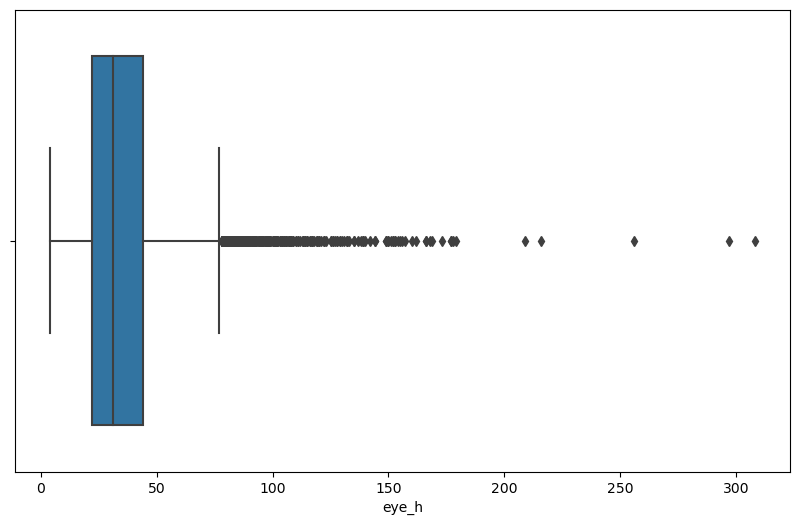

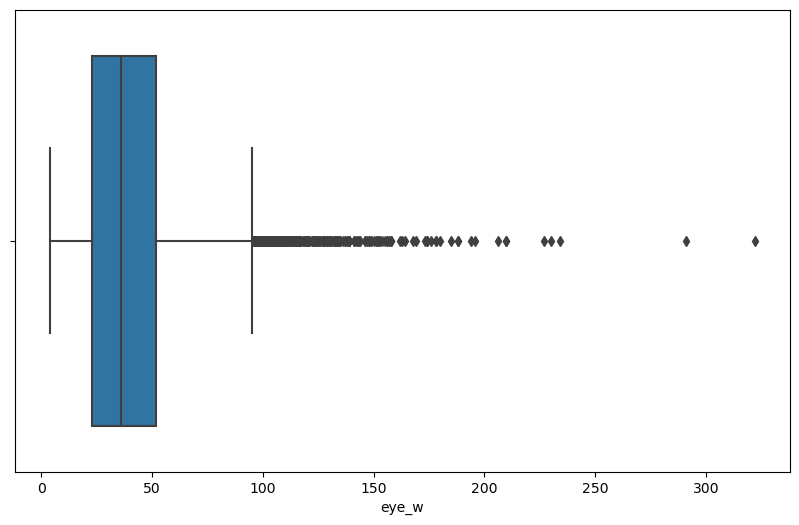

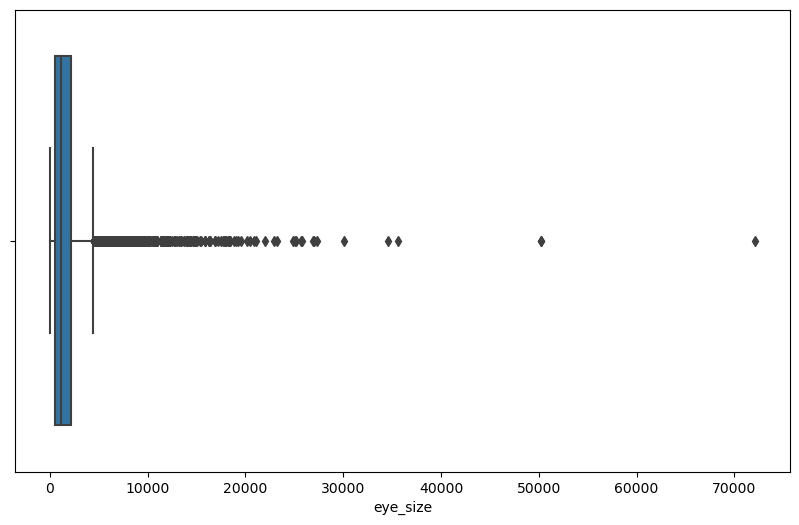

In [17]:
box_plot(man, 'man', 'eye_h')
box_plot(man, 'man', 'eye_w')
box_plot(man, 'man', 'eye_size')

### 코

이상치 개수: 484
이상치 제거한 데이터의 평균값: 32.5
본래 데이터의 평균값: 35.284732142857145
이상치 개수: 490
이상치 제거한 데이터의 평균값: 22.5937441643324
본래 데이터의 평균값: 25.023482142857144
이상치 개수: 896
이상치 제거한 데이터의 평균값: 743.3448175465838
본래 데이터의 평균값: 1101.6327678571429


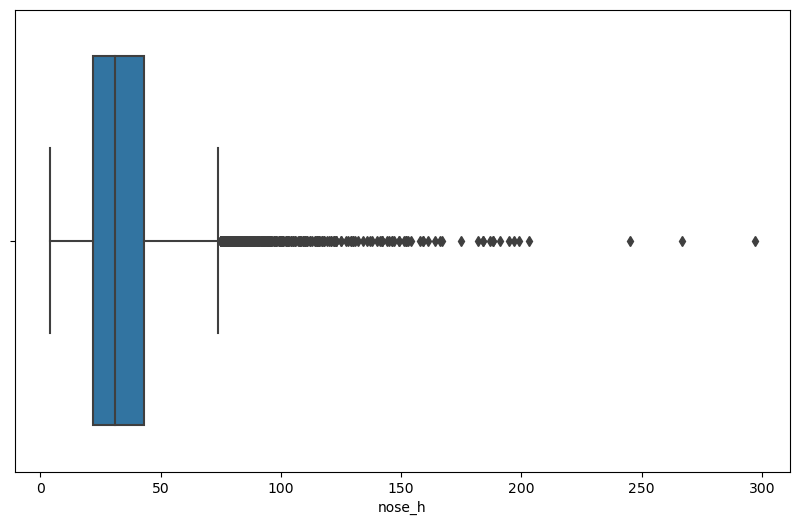

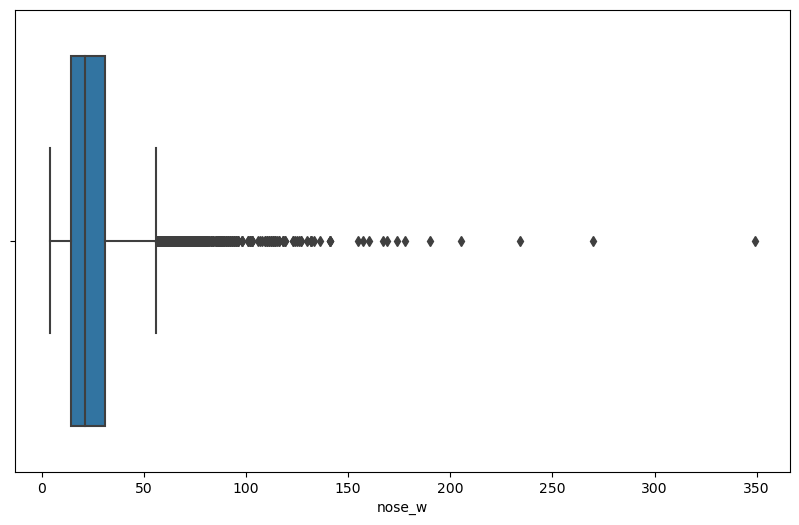

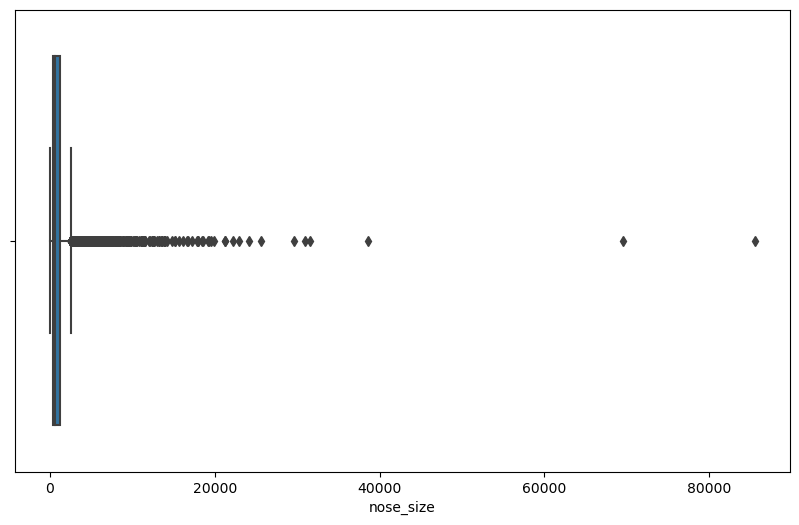

In [18]:
box_plot(man, 'man', 'nose_h')
box_plot(man, 'man', 'nose_w')
box_plot(man, 'man', 'nose_size')

### 입

이상치 개수: 454
이상치 제거한 데이터의 평균값: 30.92815931509399
본래 데이터의 평균값: 33.736875
이상치 개수: 540
이상치 제거한 데이터의 평균값: 62.373358348968104
본래 데이터의 평균값: 68.70008928571428
이상치 개수: 946
이상치 제거한 데이터의 평균값: 1977.6406280475912
본래 데이터의 평균값: 2979.847232142857


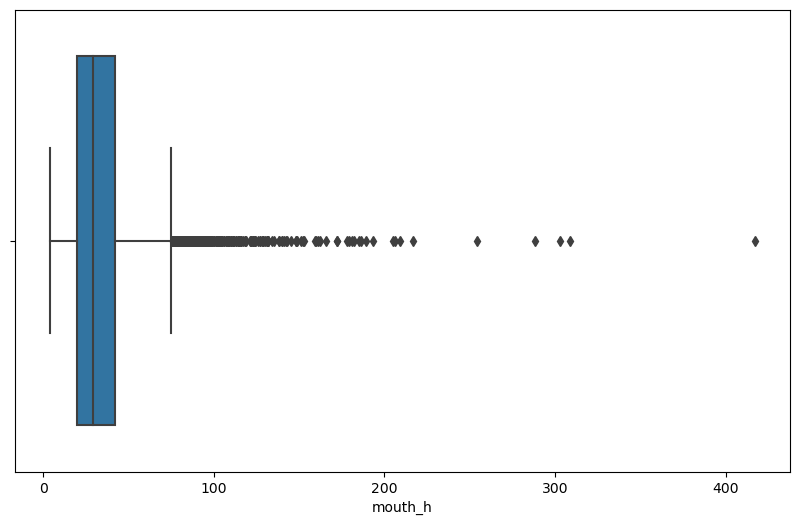

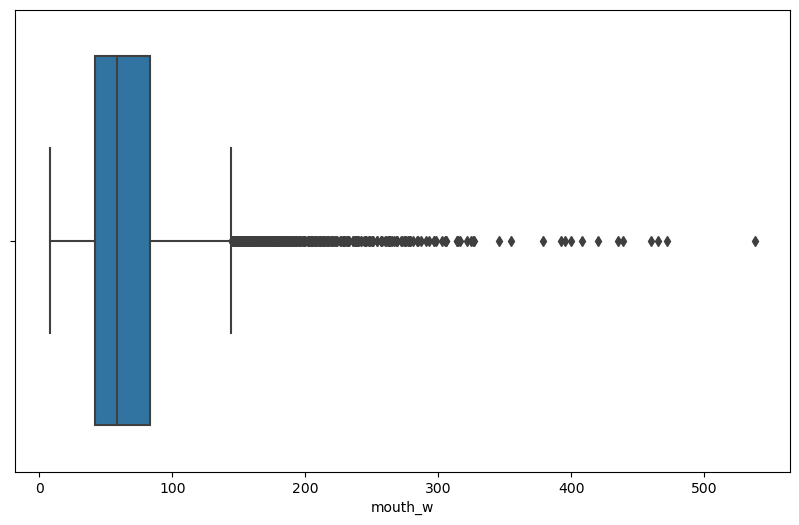

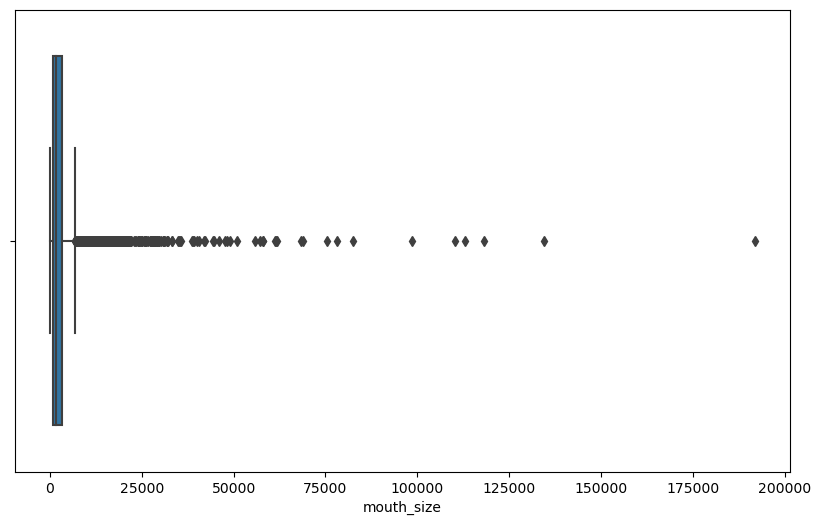

In [19]:
box_plot(man, 'man', 'mouth_h')
box_plot(man, 'man', 'mouth_w')
box_plot(man, 'man', 'mouth_size')

### 목

이상치 개수: 448
이상치 제거한 데이터의 평균값: 47.564918154761905
본래 데이터의 평균값: 50.79607142857143
이상치 개수: 468
이상치 제거한 데이터의 평균값: 56.46095788296683
본래 데이터의 평균값: 60.70169642857143
이상치 개수: 770
이상치 제거한 데이터의 평균값: 2769.0974113135185
본래 데이터의 평균값: 3534.431875


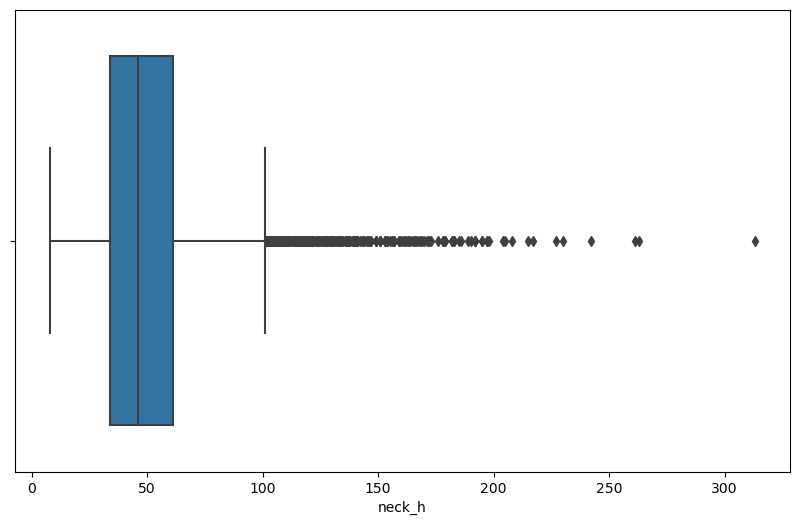

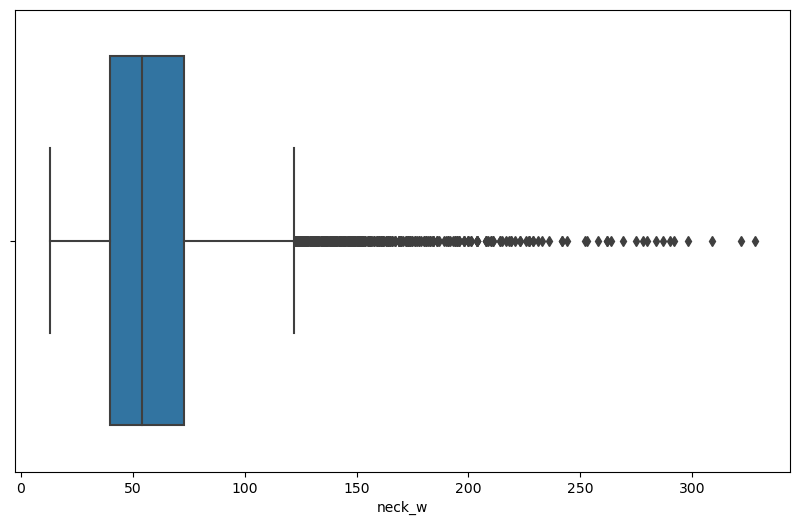

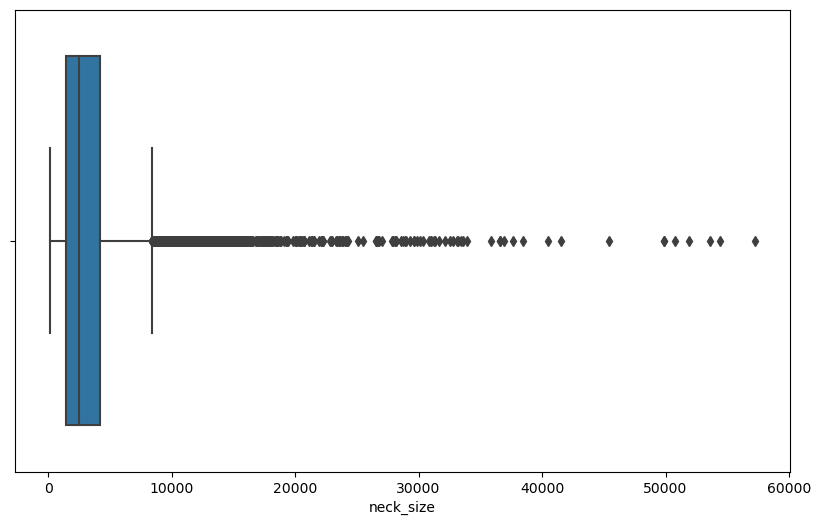

In [20]:
box_plot(man, 'man', 'neck_h')
box_plot(man, 'man', 'neck_w')
box_plot(man, 'man', 'neck_size')

### 팔

이상치 개수: 136
이상치 제거한 데이터의 평균값: 212.01274403470717
본래 데이터의 평균값: 215.71446428571429
이상치 개수: 281
이상치 제거한 데이터의 평균값: 125.71517538236102
본래 데이터의 평균값: 130.9700892857143
이상치 개수: 520
이상치 제거한 데이터의 평균값: 25927.4095505618
본래 데이터의 평균값: 29291.583303571428


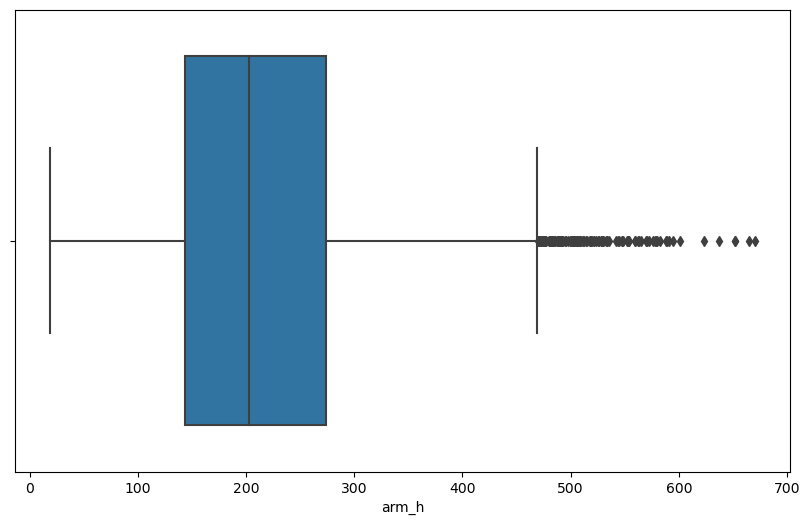

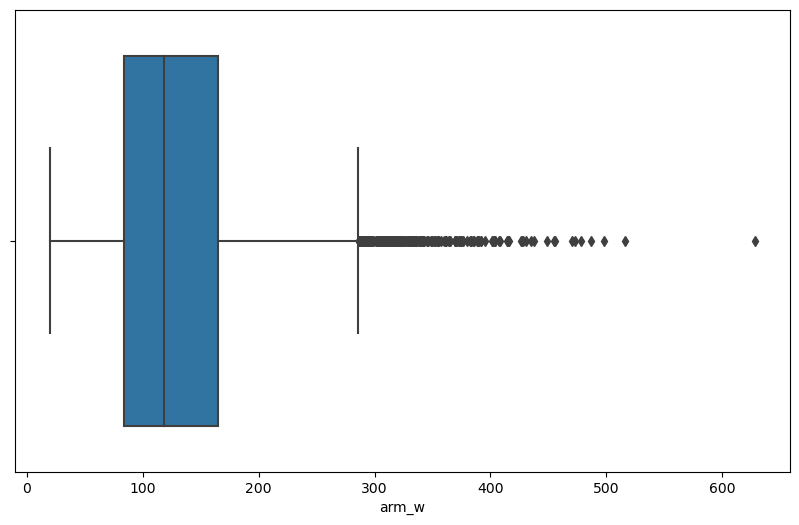

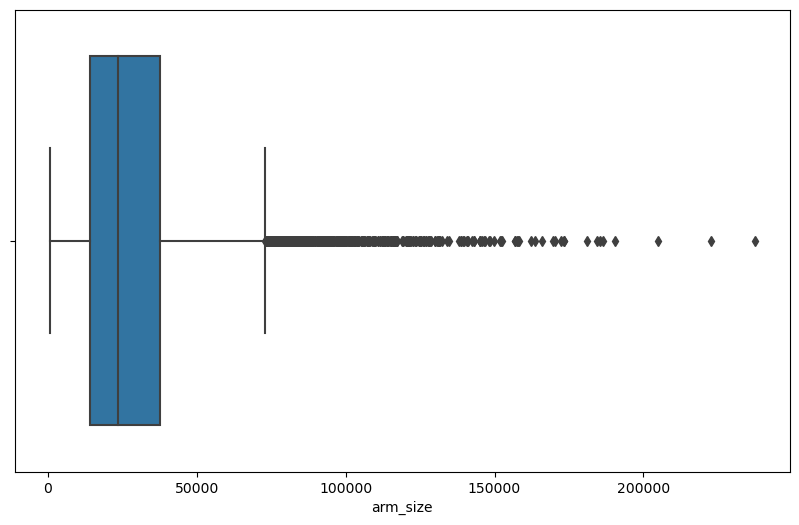

In [22]:
box_plot(man, 'man', 'arm_h')
box_plot(man, 'man', 'arm_w')
box_plot(man, 'man', 'arm_size')

### 손

이상치 개수: 394
이상치 제거한 데이터의 평균값: 61.65167499537294
본래 데이터의 평균값: 65.14116071428572
이상치 개수: 337
이상치 제거한 데이터의 평균값: 63.142686182454206
본래 데이터의 평균값: 65.90991071428572
이상치 개수: 687
이상치 제거한 데이터의 평균값: 4025.9405497954913
본래 데이터의 평균값: 4919.791428571429


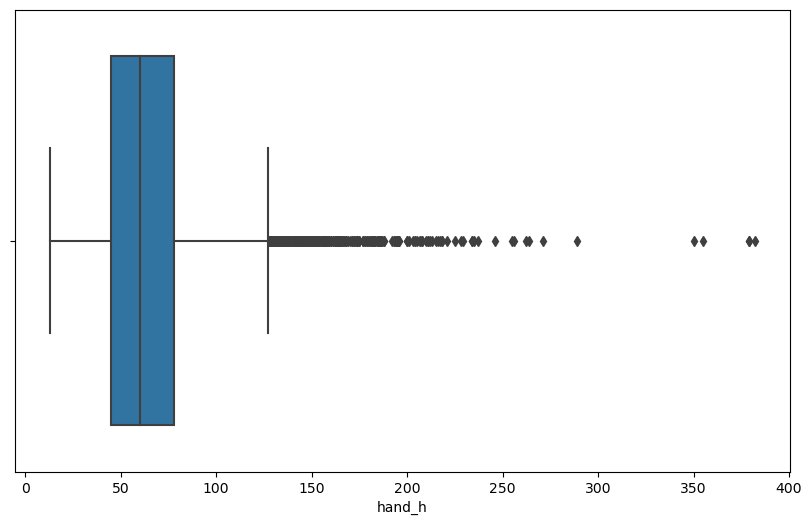

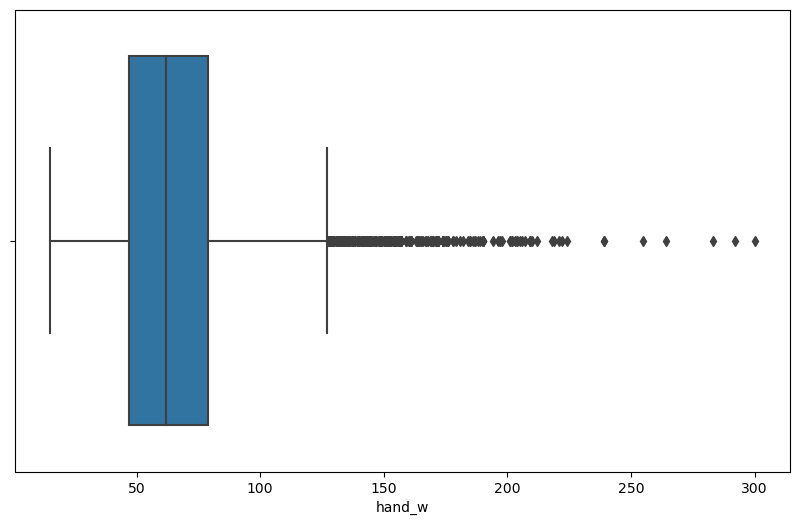

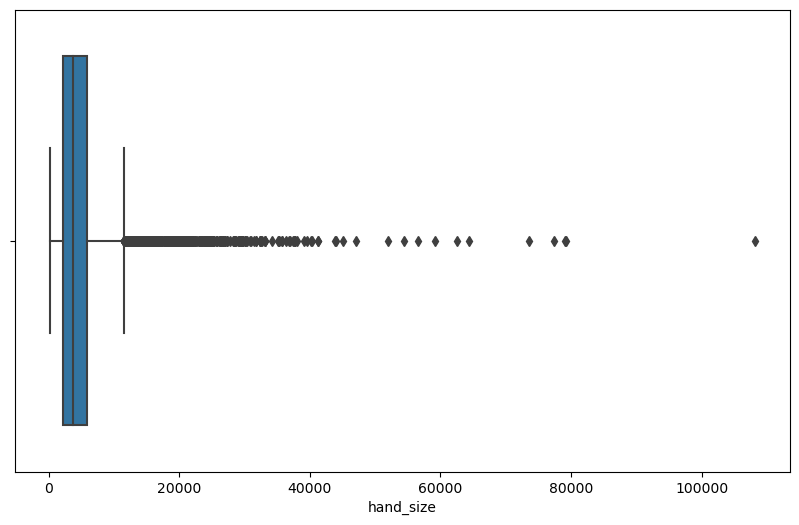

In [21]:
box_plot(man, 'man', 'hand_h')
box_plot(man, 'man', 'hand_w')
box_plot(man, 'man', 'hand_size')

## 상체

이상치 개수: 127
이상치 제거한 데이터의 평균값: 239.5500767632981
본래 데이터의 평균값: 242.65098214285715
이상치 개수: 358
이상치 제거한 데이터의 평균값: 165.24810920494374
본래 데이터의 평균값: 173.62053571428572
이상치 개수: 516
이상치 제거한 데이터의 평균값: 41341.94318607263
본래 데이터의 평균값: 46724.31607142857


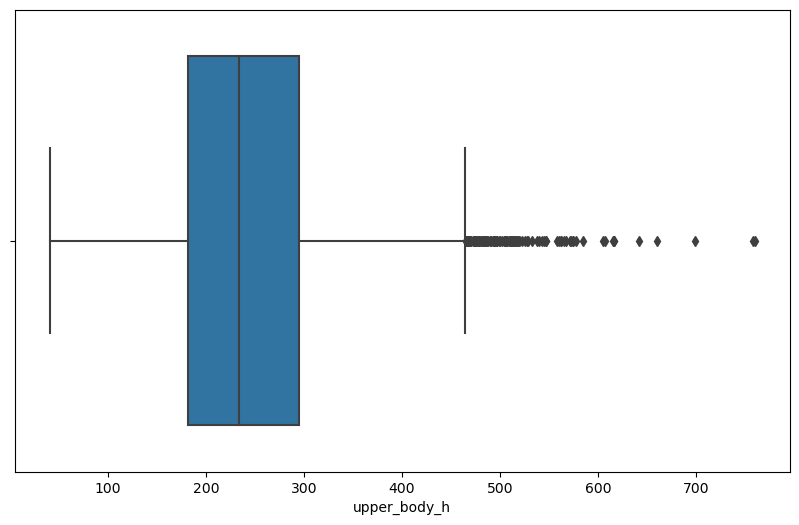

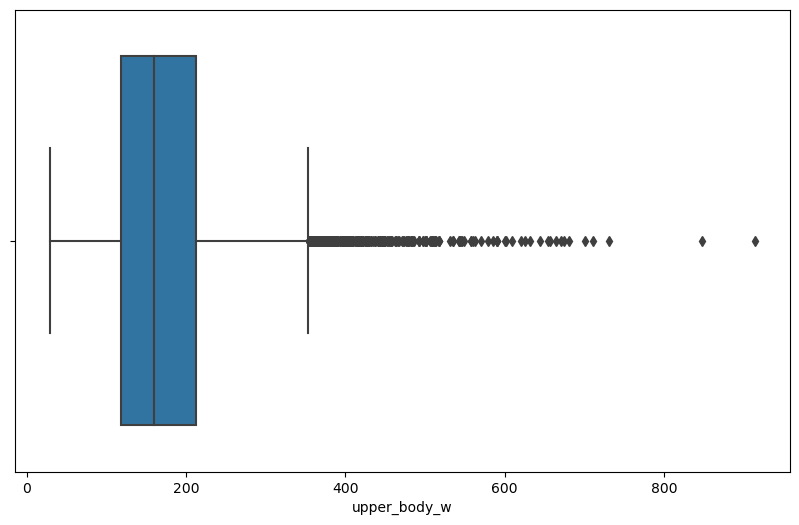

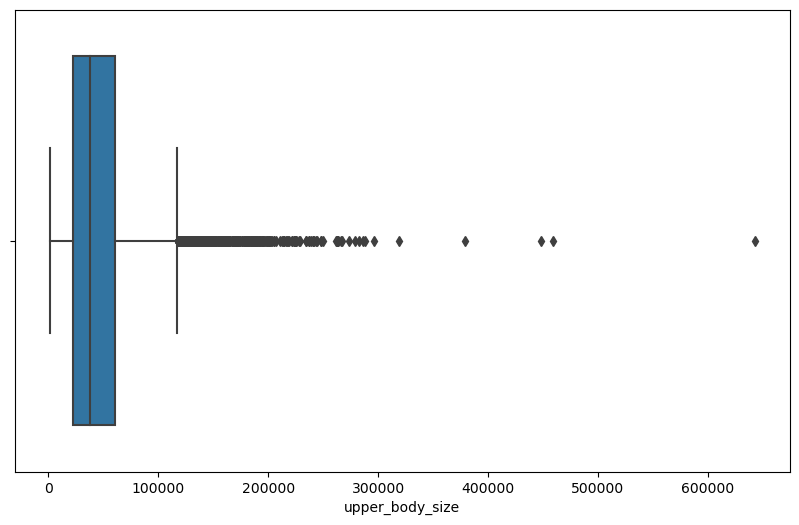

In [22]:
box_plot(man, 'man', 'upper_body_h')
box_plot(man, 'man', 'upper_body_w')
man['upper_body_size'] = man['upper_body_h'] * man['upper_body_w']
box_plot(man, 'man', 'upper_body_size')

## 다리

이상치 개수: 93
이상치 제거한 데이터의 평균값: 265.0838210137751
본래 데이터의 평균값: 267.92821428571426
이상치 개수: 318
이상치 제거한 데이터의 평균값: 114.09988972615328
본래 데이터의 평균값: 119.39455357142857
이상치 개수: 411
이상치 제거한 데이터의 평균값: 32096.591528408564
본래 데이터의 평균값: 35303.65321428572


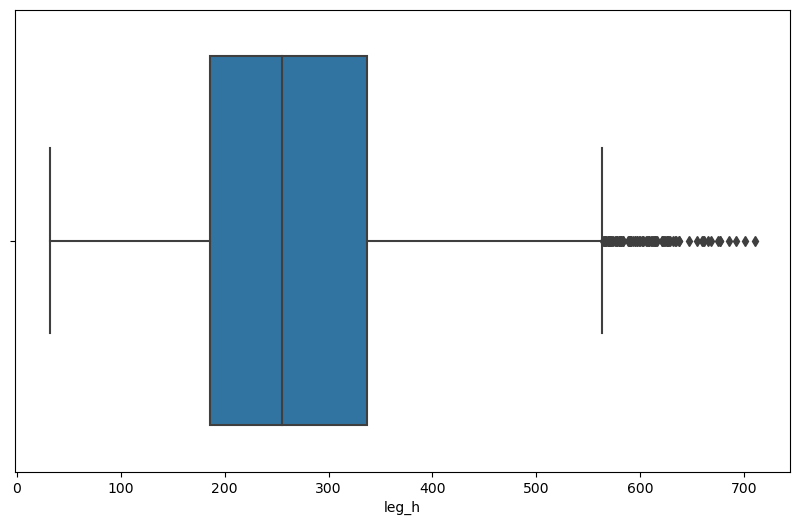

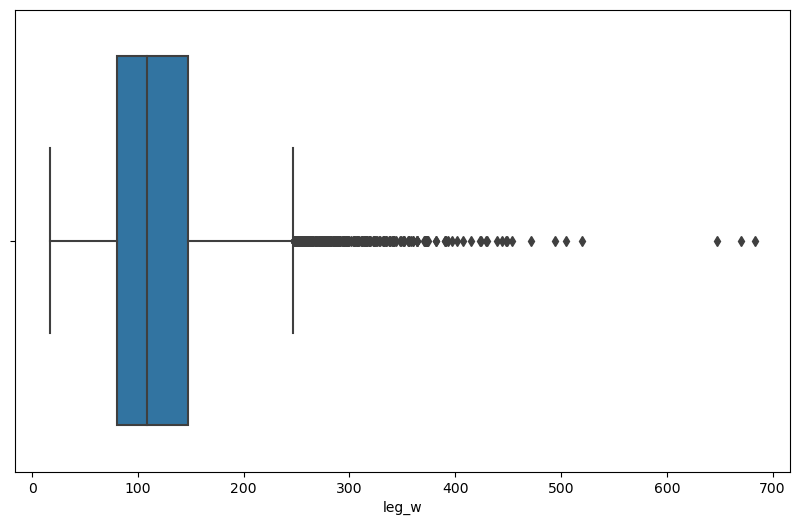

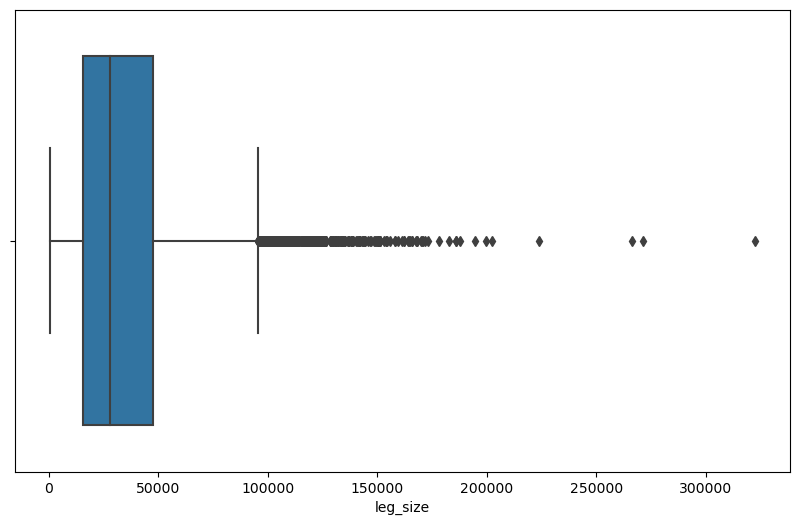

In [25]:
box_plot(man, 'man', 'leg_h')
box_plot(man, 'man', 'leg_w')
man['leg_size'] = man['leg_h'] * man['leg_w']
box_plot(man, 'man', 'leg_size')

## 발

이상치 개수: 324
이상치 제거한 데이터의 평균값: 61.866678926075764
본래 데이터의 평균값: 64.389375
이상치 개수: 290
이상치 제거한 데이터의 평균값: 83.85554537121907
본래 데이터의 평균값: 87.34991071428571
이상치 개수: 654
이상치 제거한 데이터의 평균값: 5323.528162336431
본래 데이터의 평균값: 6334.263392857143


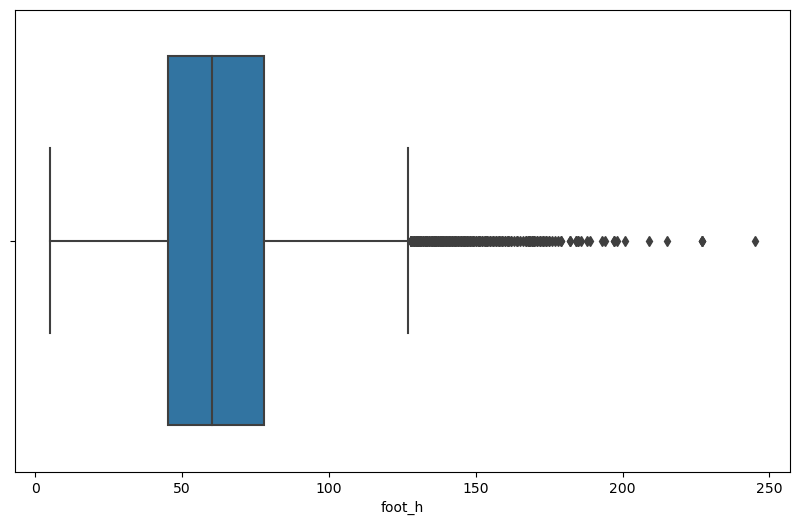

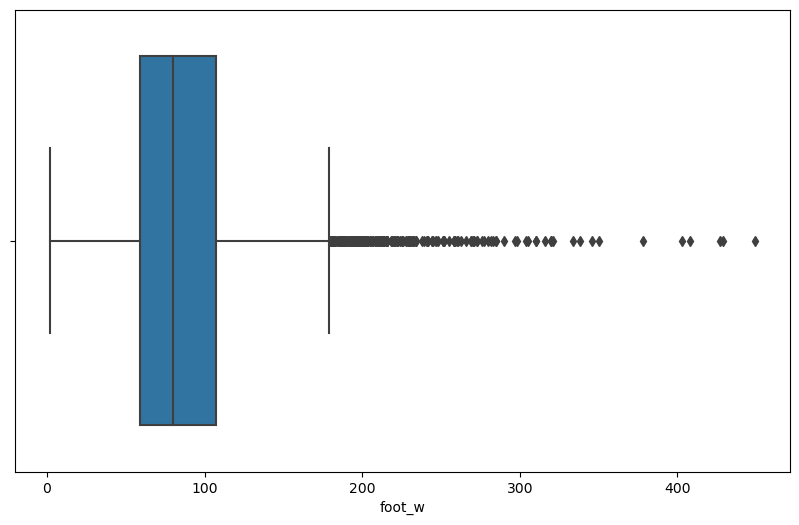

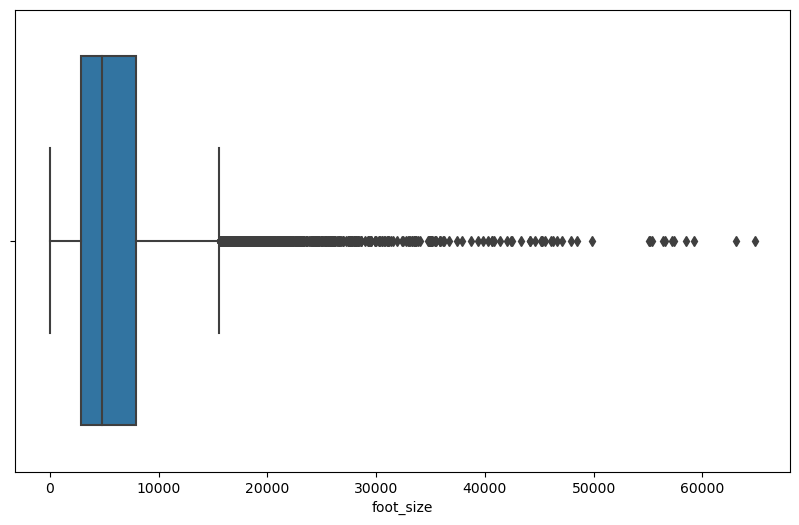

In [24]:
box_plot(man, 'man', 'foot_h')
box_plot(man, 'man', 'foot_w')
man['foot_size'] = man['foot_h'] * man['foot_w']
box_plot(man, 'man', 'foot_size')

## 신발1

이상치 개수: 494
이상치 제거한 데이터의 평균값: 85.27293106669157
본래 데이터의 평균값: 90.71428571428571
이상치 개수: 362
이상치 제거한 데이터의 평균값: 108.84222181214245
본래 데이터의 평균값: 113.65303571428572
이상치 개수: 700
이상치 제거한 데이터의 평균값: 9403.196095238096
본래 데이터의 평균값: 11193.615803571429


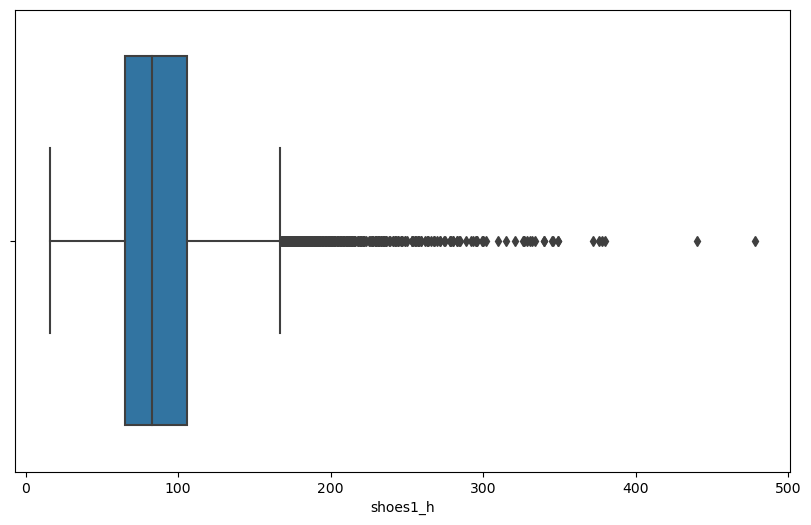

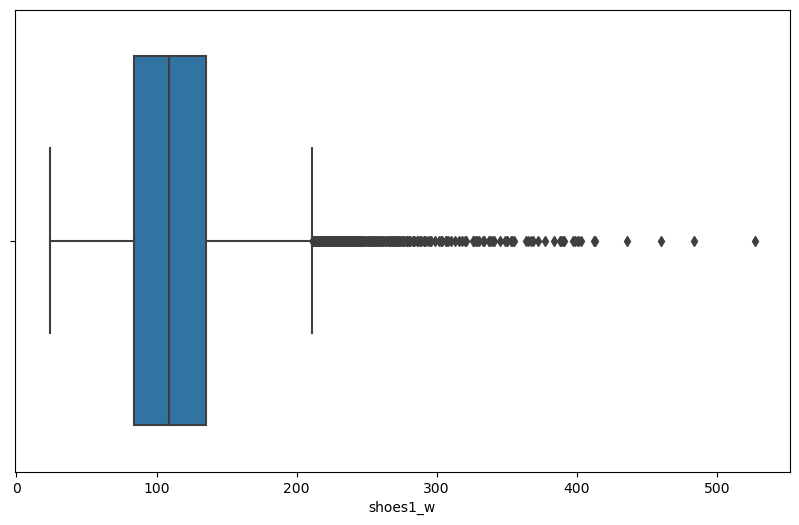

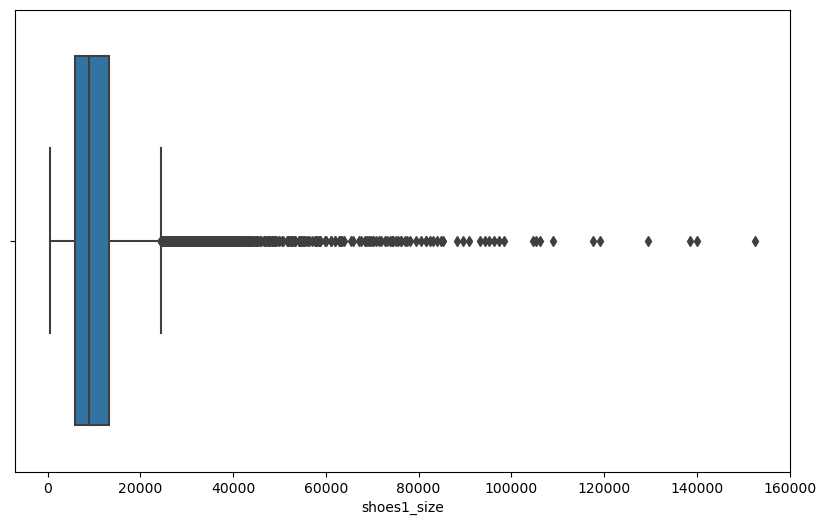

In [34]:
box_plot(man, 'man', 'shoes1_h')
box_plot(man, 'man', 'shoes1_w')
man['shoes1_size'] = man['shoes1_h'] * man['shoes1_w']
box_plot(man, 'man', 'shoes1_size')

## 신발2

이상치 개수: 559
이상치 제거한 데이터의 평균값: 80.64326661028099
본래 데이터의 평균값: 86.51285714285714
이상치 개수: 305
이상치 제거한 데이터의 평균값: 113.68921523634695
본래 데이터의 평균값: 118.13830357142857
이상치 개수: 642
이상치 제거한 데이터의 평균값: 9461.66480394014
본래 데이터의 평균값: 11221.292232142858


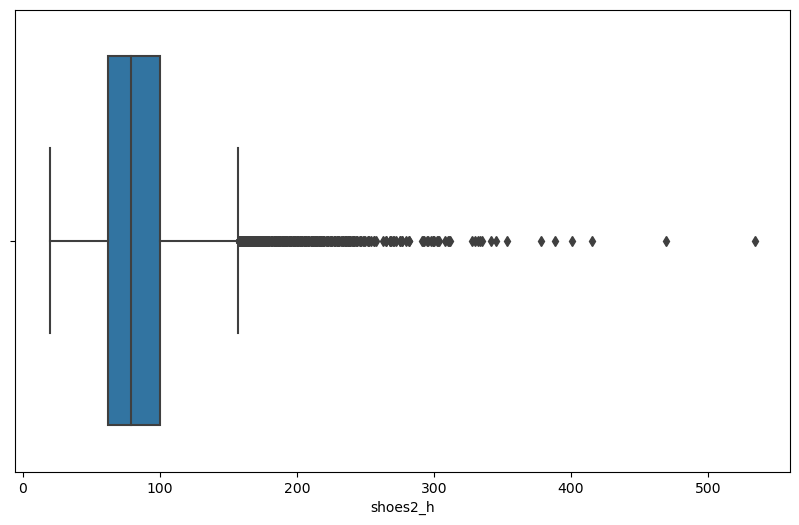

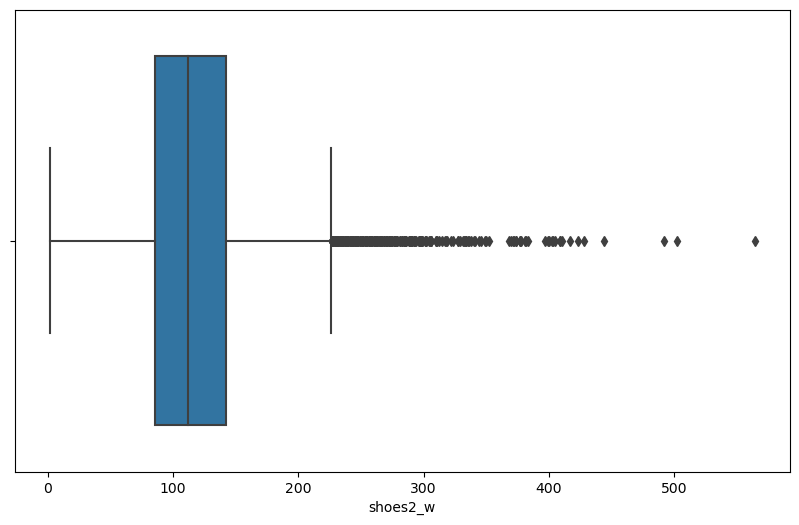

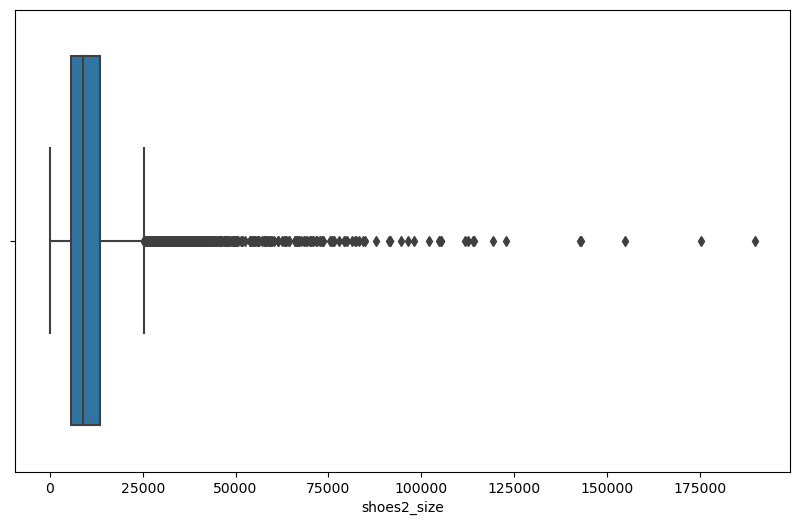

In [35]:
box_plot(man, 'man', 'shoes2_h')
box_plot(man, 'man', 'shoes2_w')
man['shoes2_size'] = man['shoes2_h'] * man['shoes2_w']
box_plot(man, 'man', 'shoes2_size')

In [33]:
man.columns

Index(['body_h', 'body_w', 'head_h', 'head_w', 'face_h', 'face_w', 'eye_h',
       'eye_w', 'nose_h', 'nose_w', 'mouth_h', 'mouth_w', 'ear_h', 'ear_w',
       'neck_h', 'neck_w', 'upper_body_h', 'upper_body_w', 'foot_h', 'foot_w',
       'leg_h', 'leg_w', 'shoes1_h', 'shoes1_w', 'shoes2_h', 'shoes2_w',
       'arm_h', 'arm_w', 'hand_h', 'hand_w', 'face_size', 'ear_size',
       'eye_size', 'nose_size', 'body_size', 'neck_size', 'arm_size',
       'hand_size', 'mouth_size', 'upper_body_size', 'foot_size'],
      dtype='object')

-----------------------
## 여자 통계량

-----------------------

### 몸

이상치 개수: 0
이상치 제거한 데이터의 평균값: 837.4175892857143
본래 데이터의 평균값: 837.4175892857143
이상치 개수: 277
이상치 제거한 데이터의 평균값: 440.7131740364369
본래 데이터의 평균값: 454.05848214285714
이상치 개수: 293
이상치 제거한 데이터의 평균값: 385766.01338589896
본래 데이터의 평균값: 405232.68


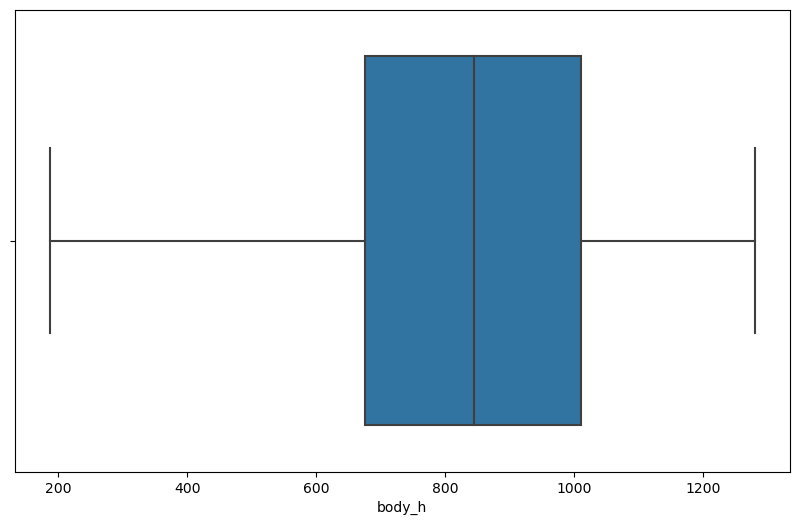

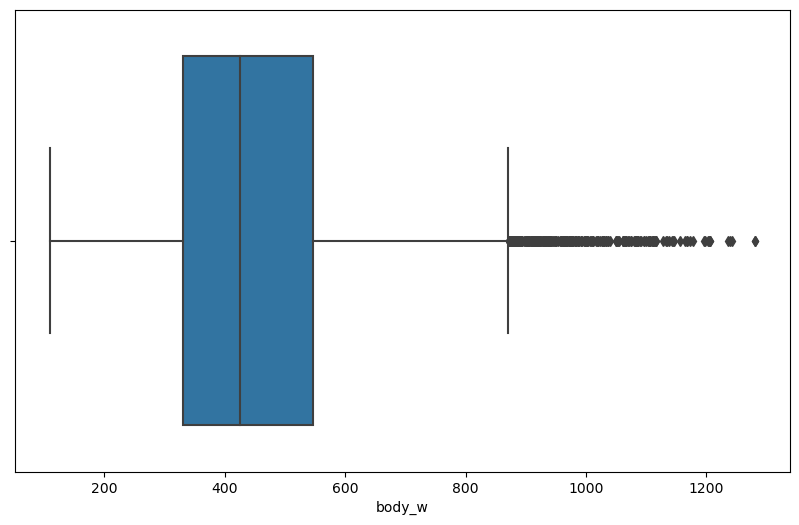

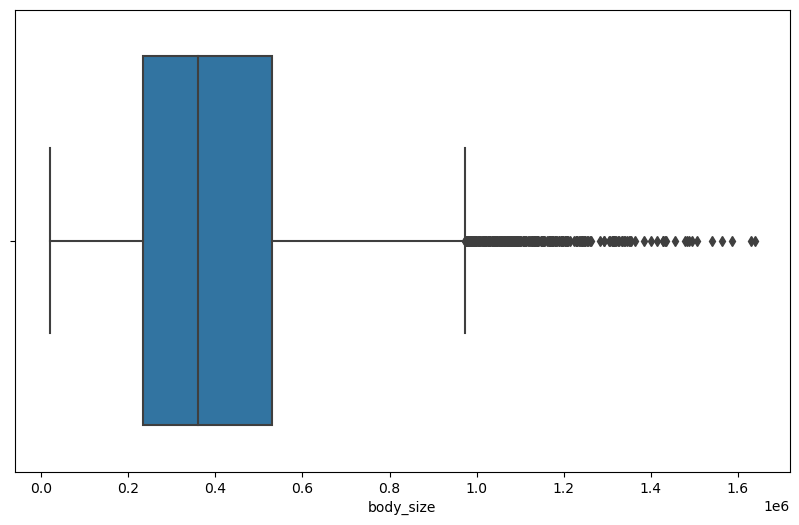

In [36]:
box_plot(woman, 'woman', 'body_h')
box_plot(woman, 'woman', 'body_w')
box_plot(woman, 'woman', 'body_size')

### 얼굴

이상치 개수: 408
이상치 제거한 데이터의 평균값: 152.23434025203855
본래 데이터의 평균값: 160.55339285714285
이상치 개수: 404
이상치 제거한 데이터의 평균값: 263.760003705076
본래 데이터의 평균값: 277.1535714285714
이상치 개수: 760
이상치 제거한 데이터의 평균값: 41234.73668582376
본래 데이터의 평균값: 51292.932857142856


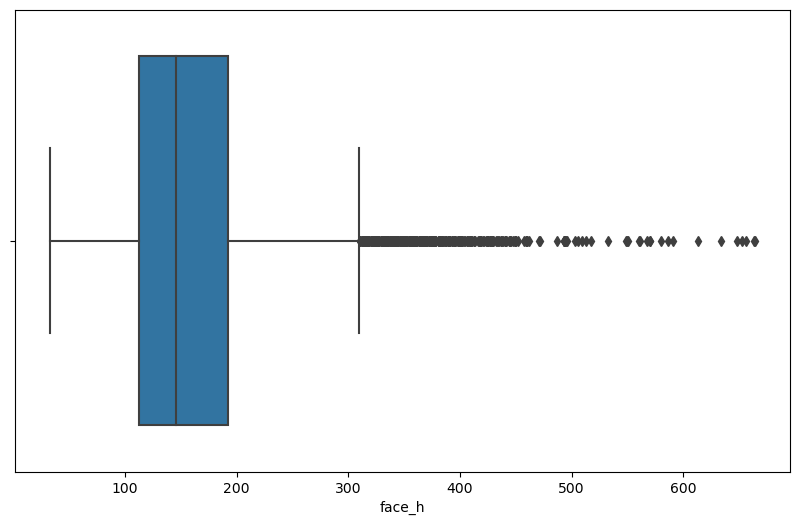

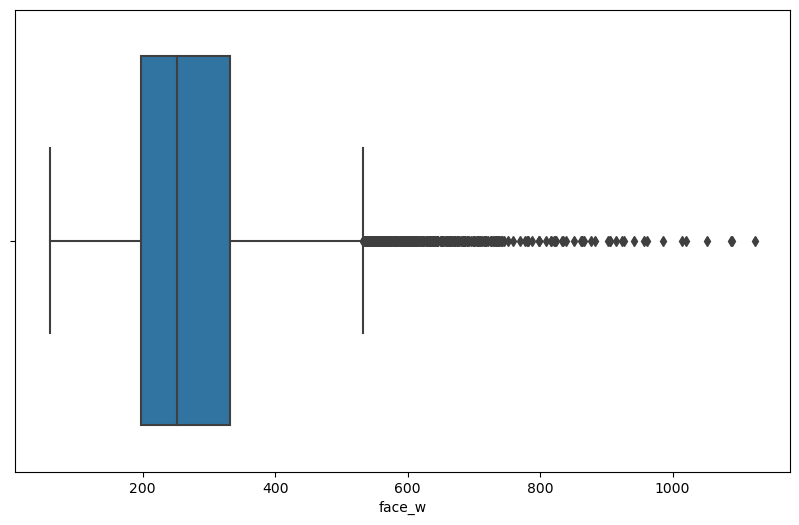

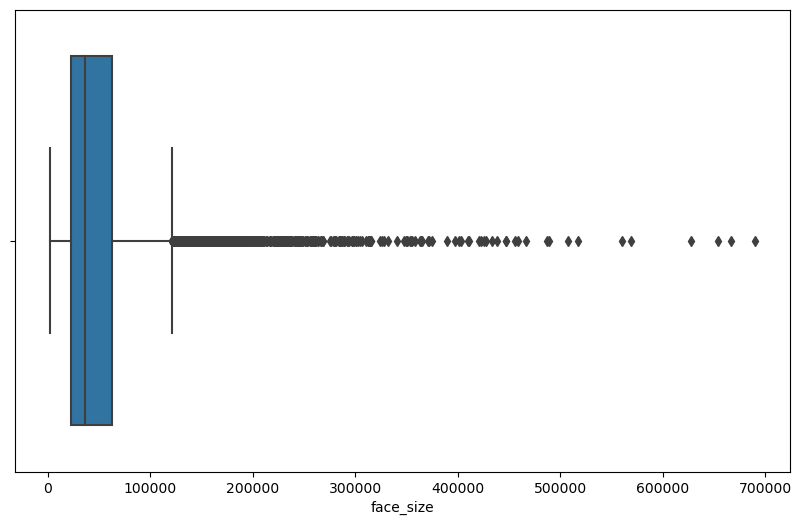

In [37]:
box_plot(woman, 'woman', 'face_h')
box_plot(woman, 'woman', 'face_w')
box_plot(woman, 'woman', 'face_size')

### 눈

이상치 개수: 376
이상치 제거한 데이터의 평균값: 35.38728750923873
본래 데이터의 평균값: 37.674910714285716
이상치 개수: 329
이상치 제거한 데이터의 평균값: 40.317634072302454
본래 데이터의 평균값: 42.80625
이상치 개수: 834
이상치 제거한 데이터의 평균값: 1458.7306579201236
본래 데이터의 평균값: 1978.7267857142858


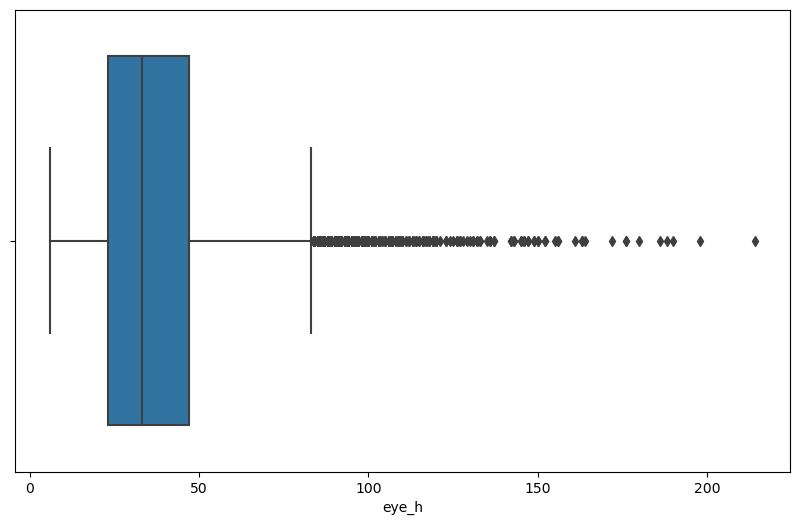

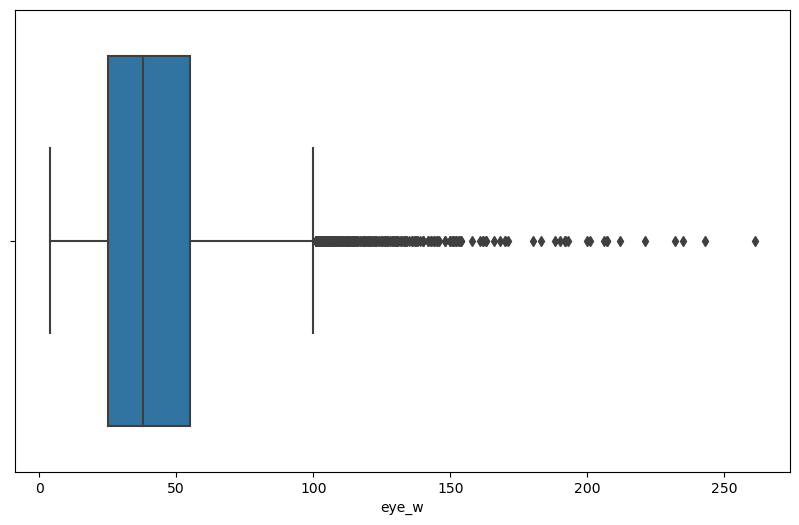

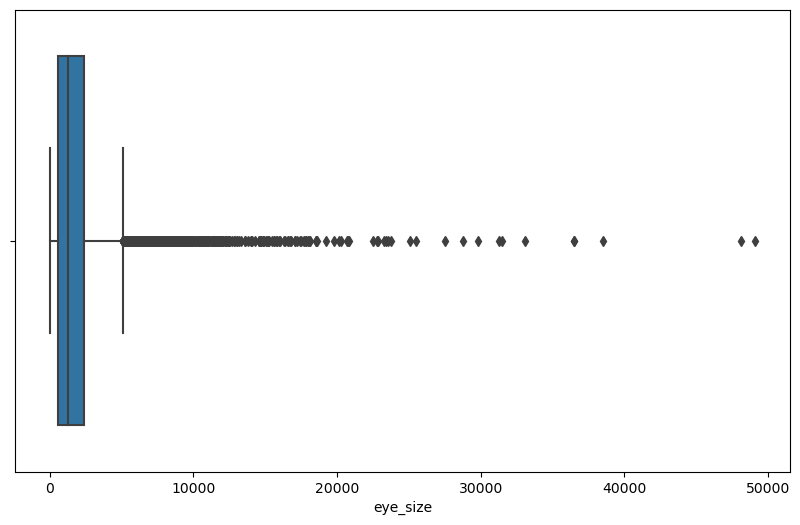

In [38]:
box_plot(woman, 'woman', 'eye_h')
box_plot(woman, 'woman', 'eye_w')
box_plot(woman, 'woman', 'eye_size')

### 코

이상치 개수: 460
이상치 제거한 데이터의 평균값: 31.97951582867784
본래 데이터의 평균값: 34.86866071428572
이상치 개수: 548
이상치 제거한 데이터의 평균값: 21.858524220803606
본래 데이터의 평균값: 24.571607142857143
이상치 개수: 944
이상치 제거한 데이터의 평균값: 706.8583268330733
본래 데이터의 평균값: 1104.312232142857


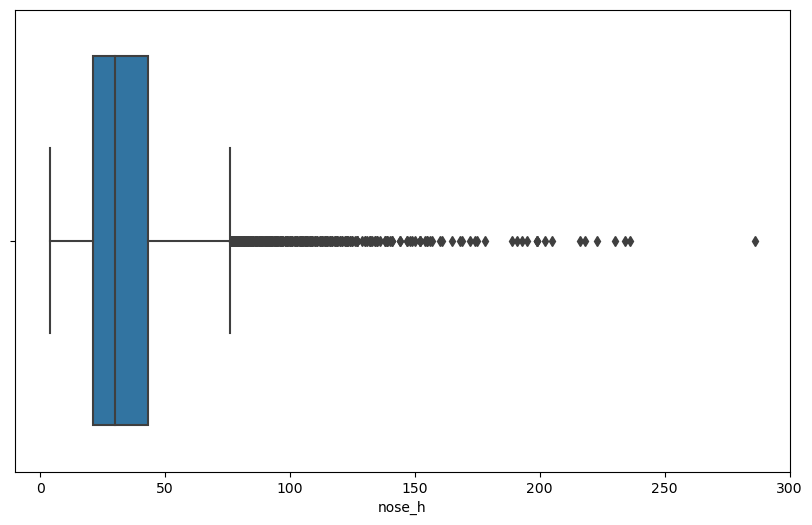

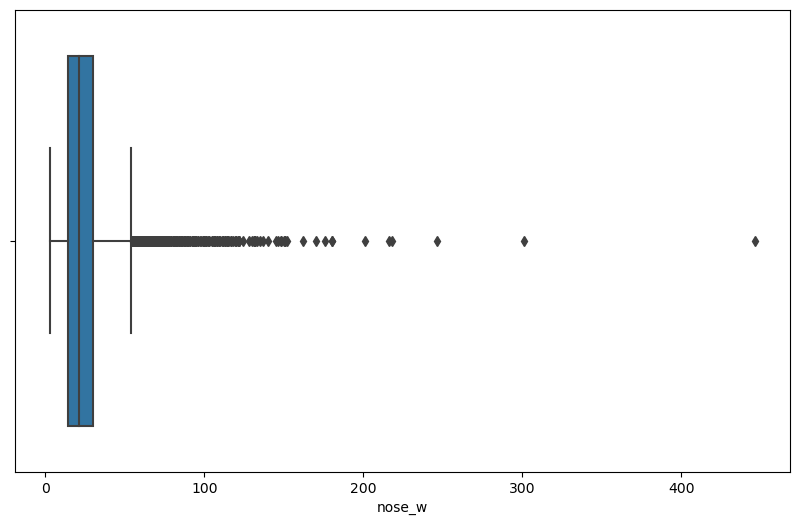

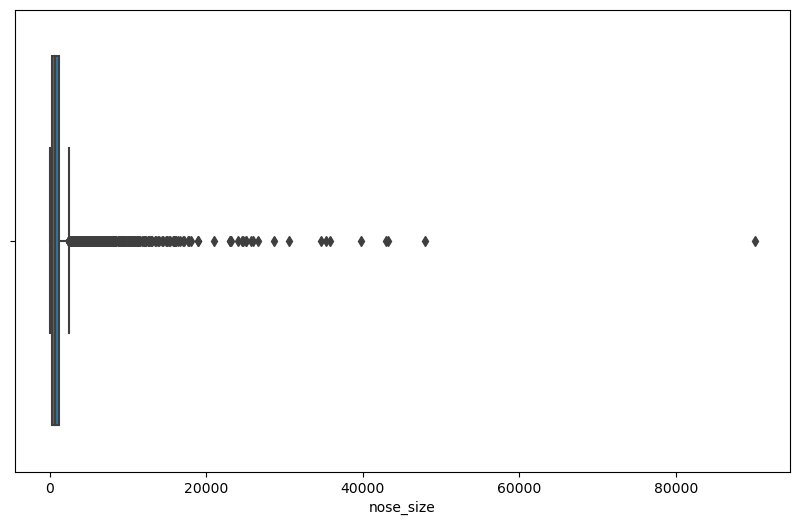

In [39]:
box_plot(woman, 'woman', 'nose_h')
box_plot(woman, 'woman', 'nose_w')
box_plot(woman, 'woman', 'nose_size')

### 입

이상치 개수: 504
이상치 제거한 데이터의 평균값: 30.99794315632012
본래 데이터의 평균값: 34.129375
이상치 개수: 525
이상치 제거한 데이터의 평균값: 61.82182669789227
본래 데이터의 평균값: 68.04955357142858
이상치 개수: 969
이상치 제거한 데이터의 평균값: 1961.0138793861793
본래 데이터의 평균값: 3005.1213392857144


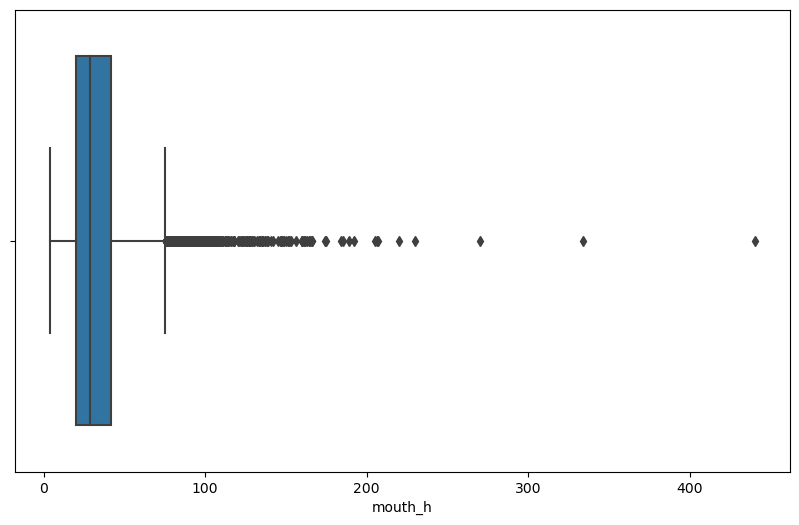

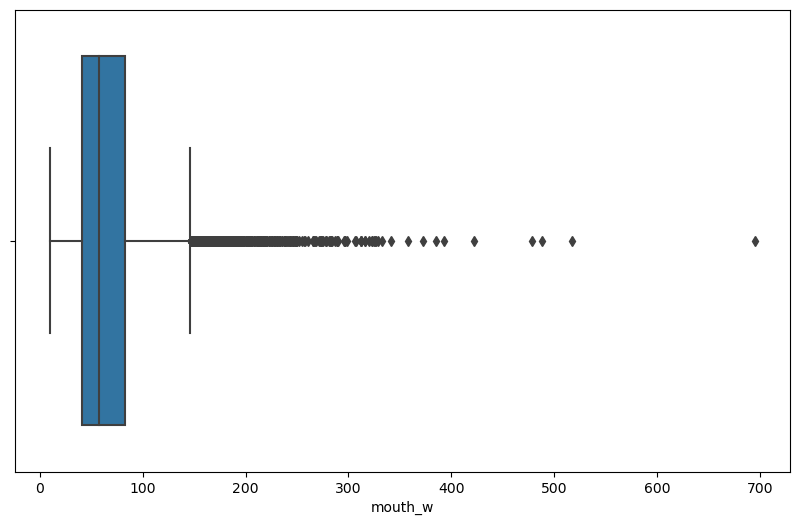

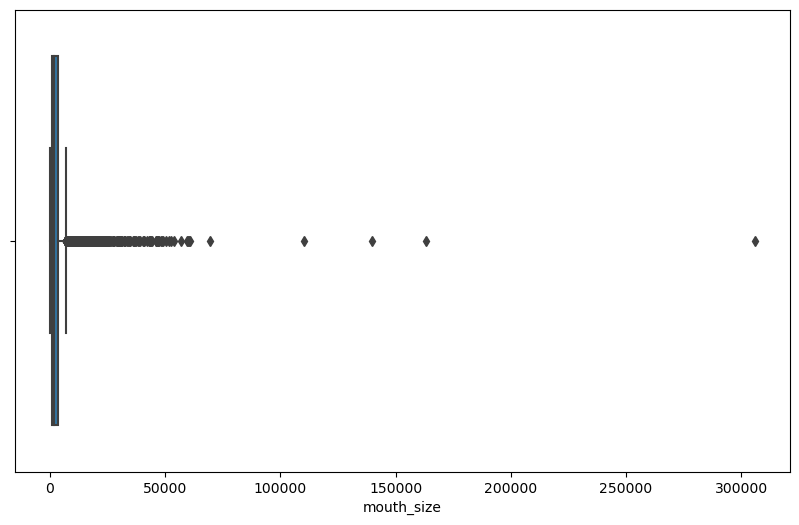

In [40]:
box_plot(woman, 'woman', 'mouth_h')
box_plot(woman, 'woman', 'mouth_w')
box_plot(woman, 'woman', 'mouth_size')

### 목

이상치 개수: 450
이상치 제거한 데이터의 평균값: 49.41832558139535
본래 데이터의 평균값: 52.88357142857143
이상치 개수: 434
이상치 제거한 데이터의 평균값: 56.43247259892254
본래 데이터의 평균값: 60.430625
이상치 개수: 788
이상치 제거한 데이터의 평균값: 2857.295236265847
본래 데이터의 평균값: 3672.381517857143


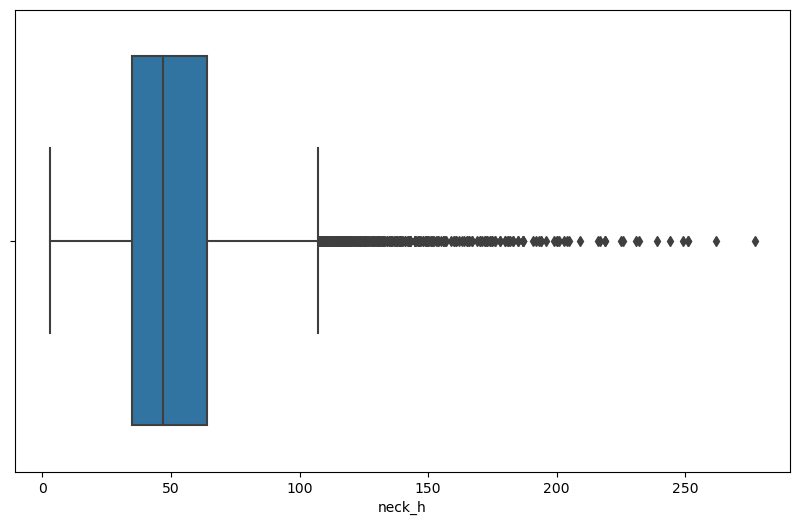

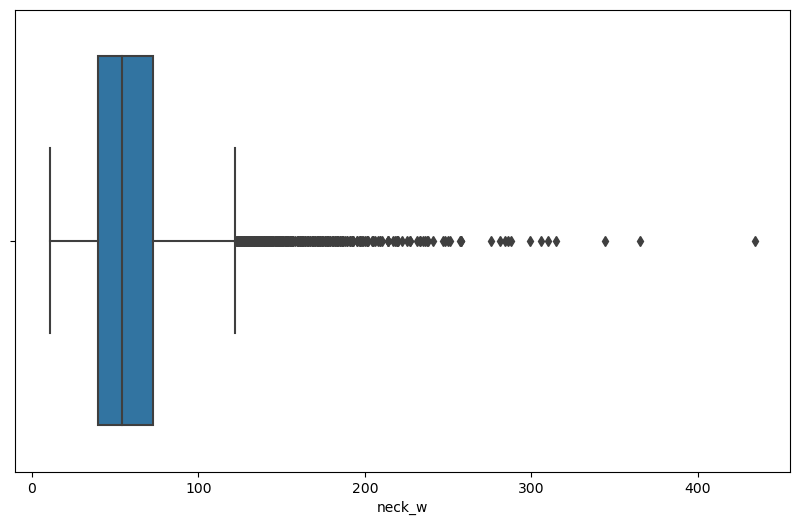

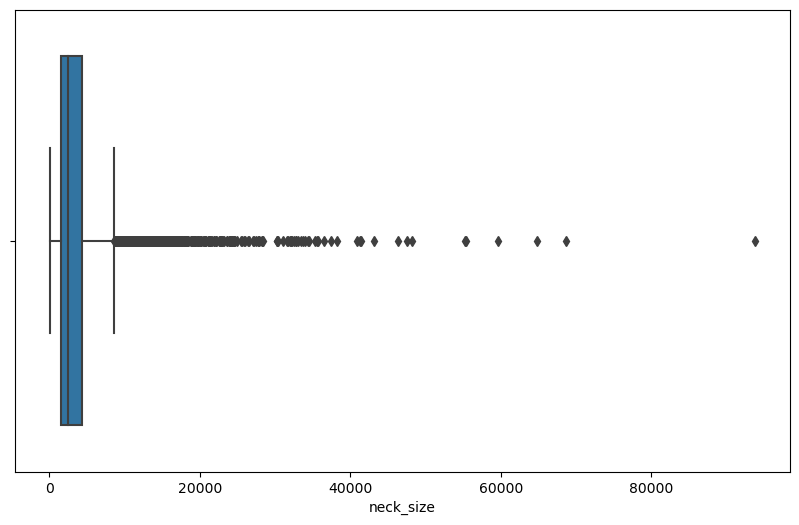

In [41]:
box_plot(woman, 'woman', 'neck_h')
box_plot(woman, 'woman', 'neck_w')
box_plot(woman, 'woman', 'neck_size')

### 팔

이상치 개수: 121
이상치 제거한 데이터의 평균값: 212.2443361314198
본래 데이터의 평균값: 215.50330357142857
이상치 개수: 251
이상치 제거한 데이터의 평균값: 128.50872225774043
본래 데이터의 평균값: 133.2975
이상치 개수: 451
이상치 제거한 데이터의 평균값: 26696.10038143083
본래 데이터의 평균값: 29657.742232142857


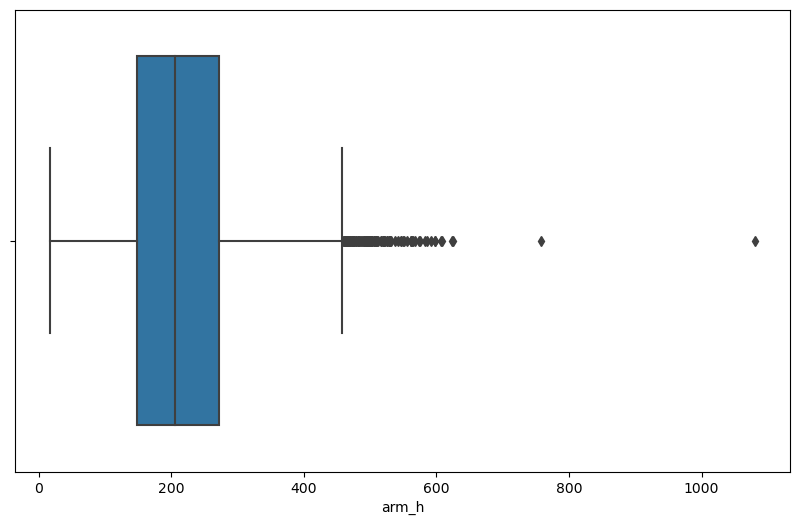

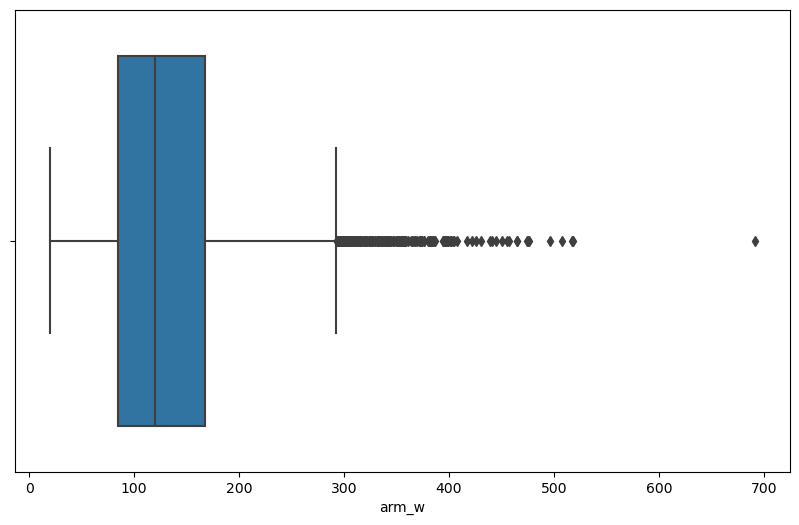

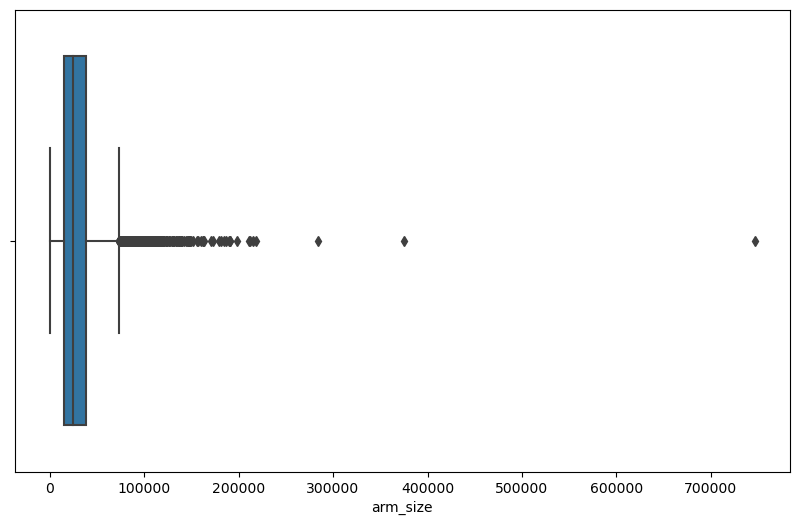

In [42]:
box_plot(woman, 'woman', 'arm_h')
box_plot(woman, 'woman', 'arm_w')
box_plot(woman, 'woman', 'arm_size')

### 손

이상치 개수: 348
이상치 제거한 데이터의 평균값: 60.761242167342424
본래 데이터의 평균값: 63.66383928571429
이상치 개수: 282
이상치 제거한 데이터의 평균값: 62.14691335409416
본래 데이터의 평균값: 64.34669642857143
이상치 개수: 619
이상치 제거한 데이터의 평균값: 3920.295907759191
본래 데이터의 평균값: 4646.983839285715


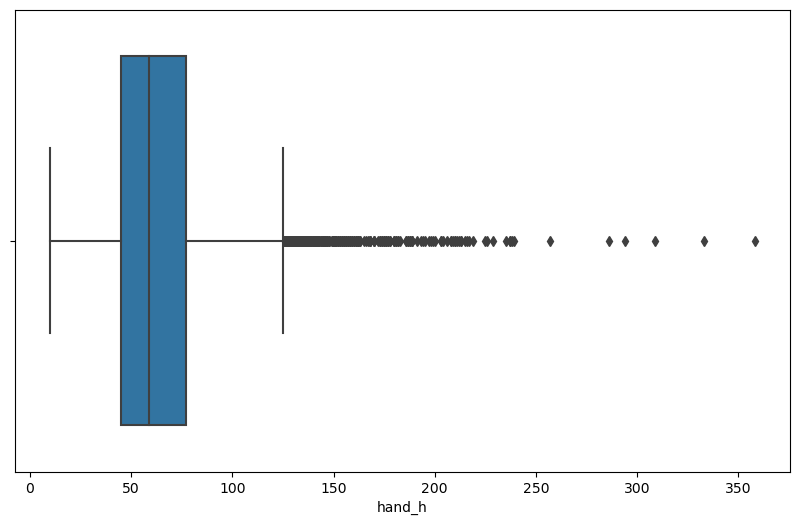

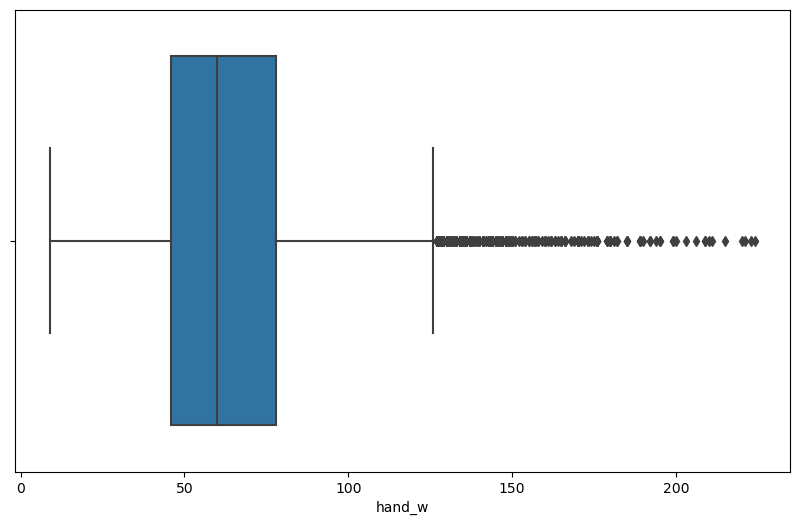

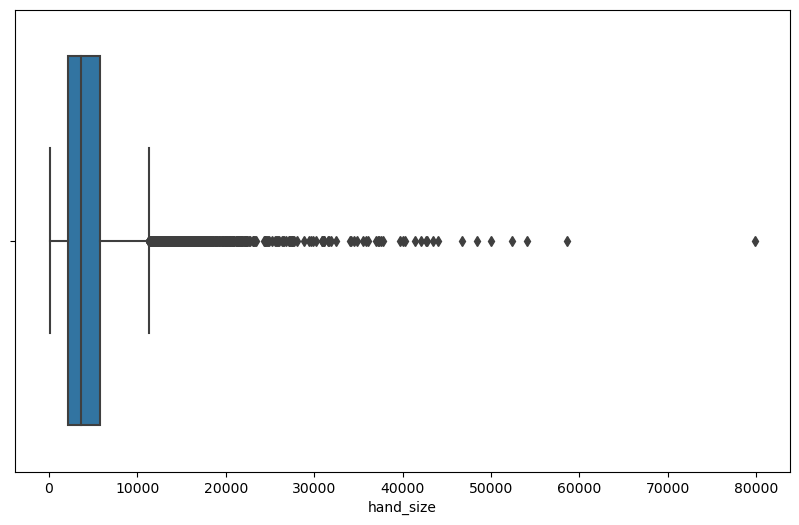

In [43]:
box_plot(woman, 'woman', 'hand_h')
box_plot(woman, 'woman', 'hand_w')
box_plot(woman, 'woman', 'hand_size')

## 상체

이상치 개수: 225
이상치 제거한 데이터의 평균값: 247.11671981776766
본래 데이터의 평균값: 253.11401785714287
이상치 개수: 364
이상치 제거한 데이터의 평균값: 171.94435215946845
본래 데이터의 평균값: 180.8925
이상치 개수: 612
이상치 제거한 데이터의 평균값: 44172.059406875705
본래 데이터의 평균값: 51407.0675


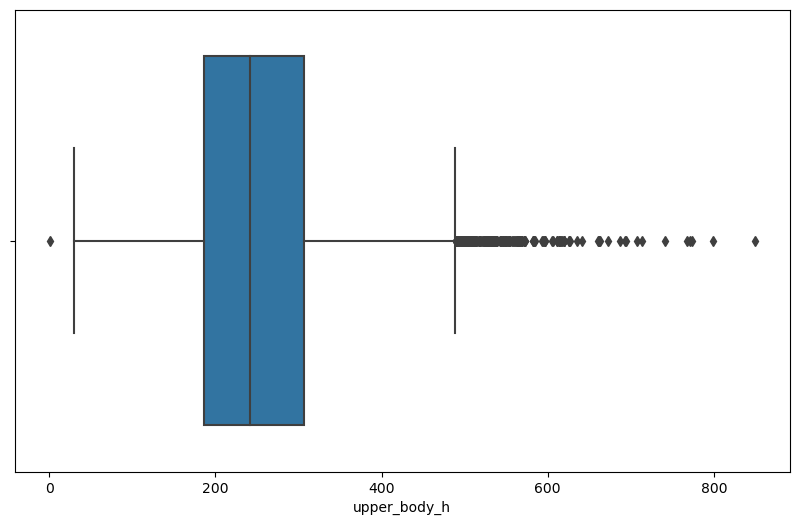

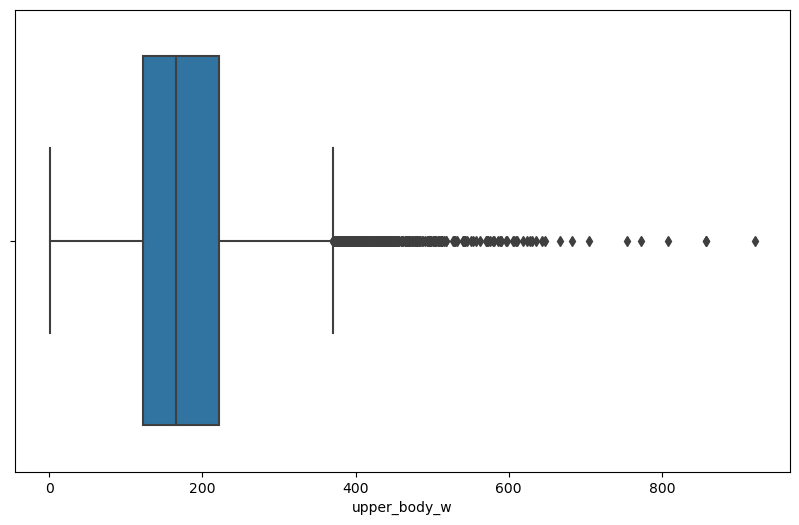

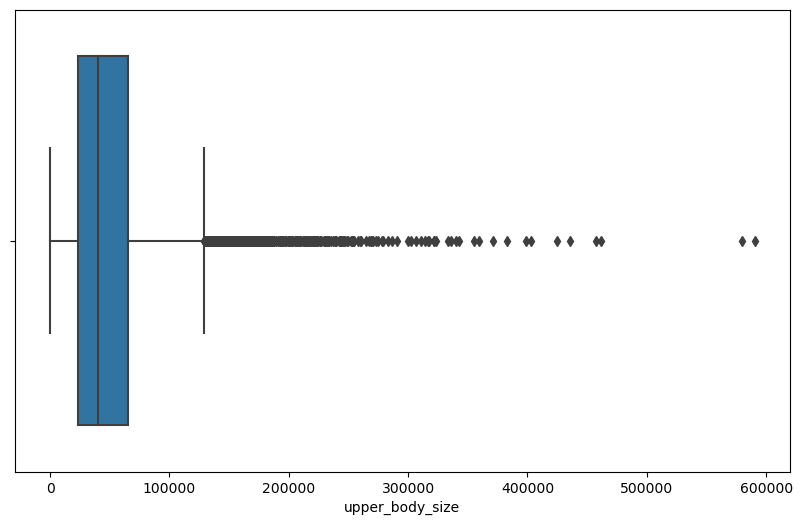

In [50]:
box_plot(woman, 'woman', 'upper_body_h')
box_plot(woman, 'woman', 'upper_body_w')
woman['upper_body_size'] = woman['upper_body_h'] * woman['upper_body_w']
box_plot(woman, 'woman', 'upper_body_size')

## 다리

이상치 개수: 115
이상치 제거한 데이터의 평균값: 233.42020748759586
본래 데이터의 평균값: 236.62535714285715
이상치 개수: 431
이상치 제거한 데이터의 평균값: 101.67768595041322
본래 데이터의 평균값: 108.144375
이상치 개수: 531
이상치 제거한 데이터의 평균값: 24885.975630330864
본래 데이터의 평균값: 28364.610535714284


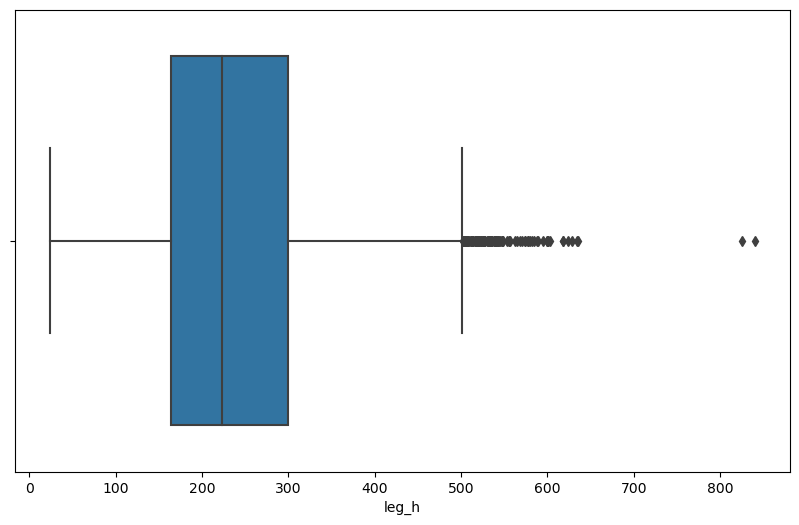

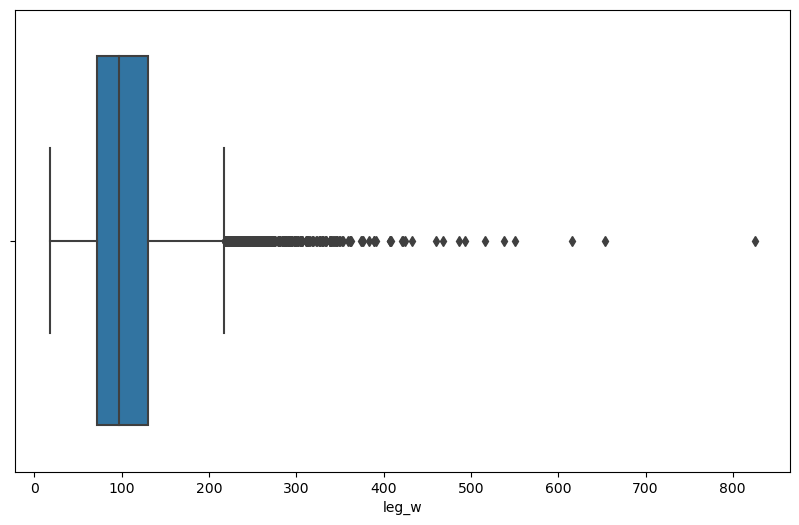

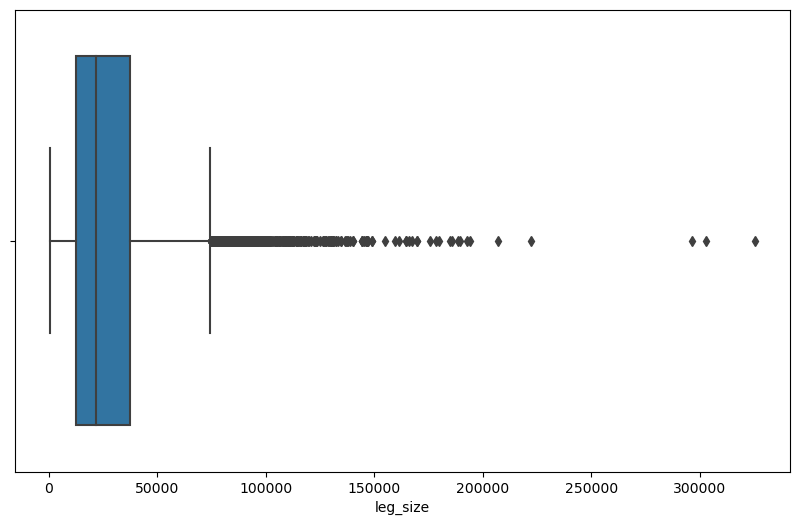

In [51]:
box_plot(woman, 'woman', 'leg_h')
box_plot(woman, 'woman', 'leg_w')
woman['leg_size'] = woman['leg_h'] * woman['leg_w']
box_plot(woman, 'woman', 'leg_size')

## 발

이상치 개수: 282
이상치 제거한 데이터의 평균값: 60.63134273676498
본래 데이터의 평균값: 62.981160714285714
이상치 개수: 309
이상치 제거한 데이터의 평균값: 80.29730970526123
본래 데이터의 평균값: 83.79232142857143
이상치 개수: 576
이상치 제거한 데이터의 평균값: 5049.717714608434
본래 데이터의 평균값: 5938.001160714286


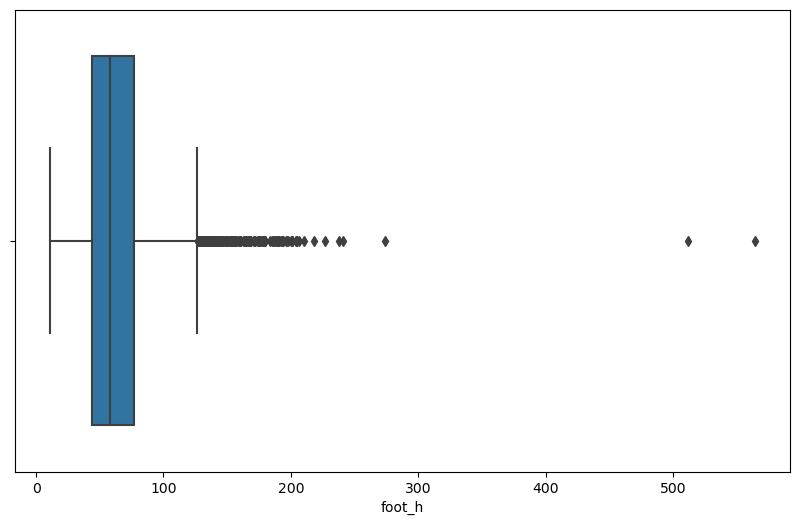

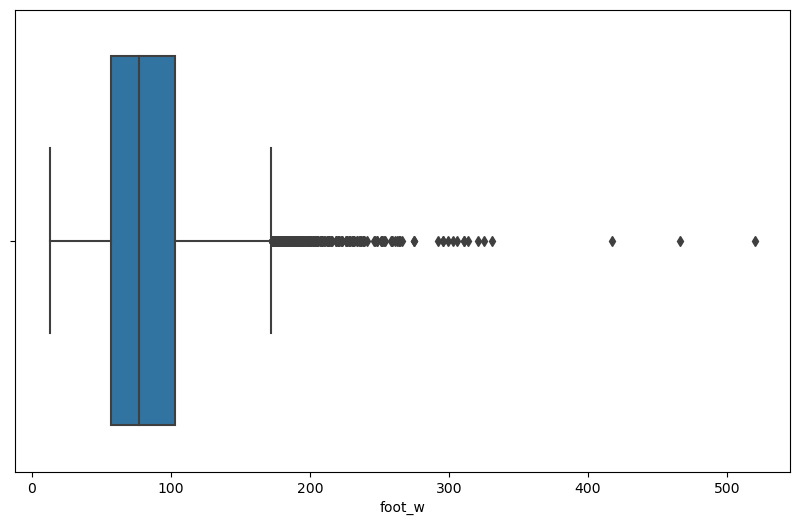

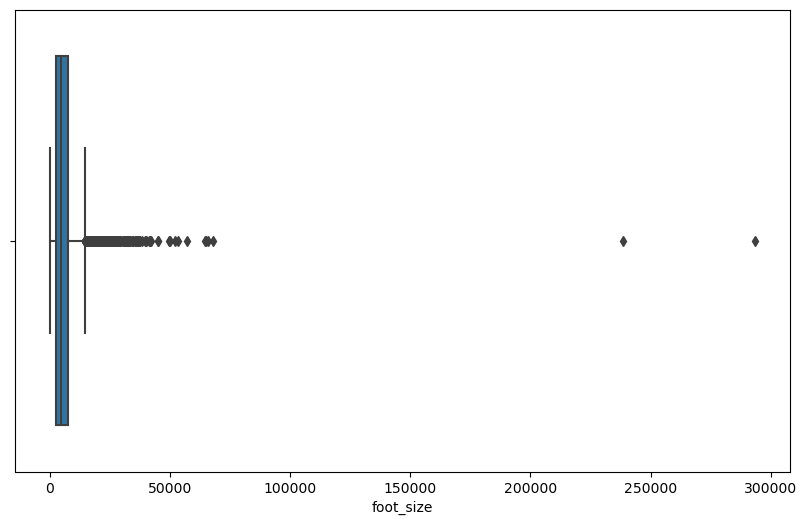

In [45]:
box_plot(woman, 'woman', 'foot_h')
box_plot(woman, 'woman', 'foot_w')
woman['foot_size'] = woman['foot_h'] * woman['foot_w']
box_plot(woman, 'woman', 'foot_size')

## 신발1

이상치 개수: 483
이상치 제거한 데이터의 평균값: 82.64402351404311
본래 데이터의 평균값: 87.92482142857143
이상치 개수: 357
이상치 제거한 데이터의 평균값: 104.07746933505487
본래 데이터의 평균값: 108.63142857142857
이상치 개수: 672
이상치 제거한 데이터의 평균값: 8774.91175911854
본래 데이터의 평균값: 10404.830625


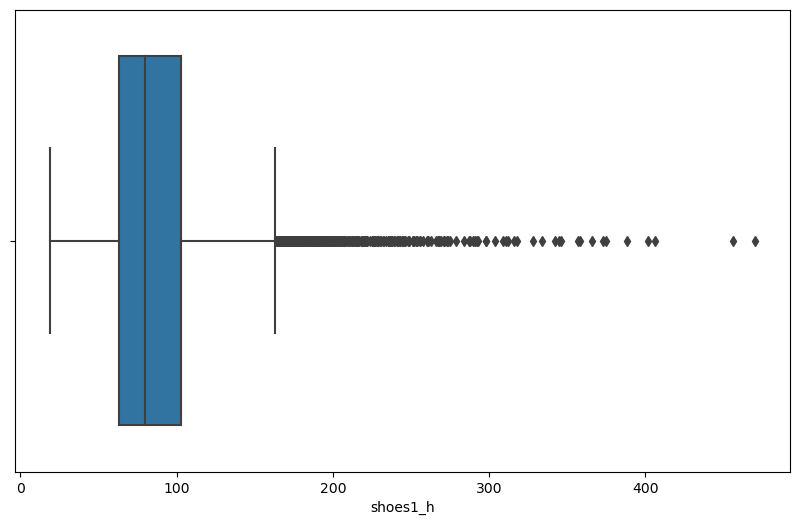

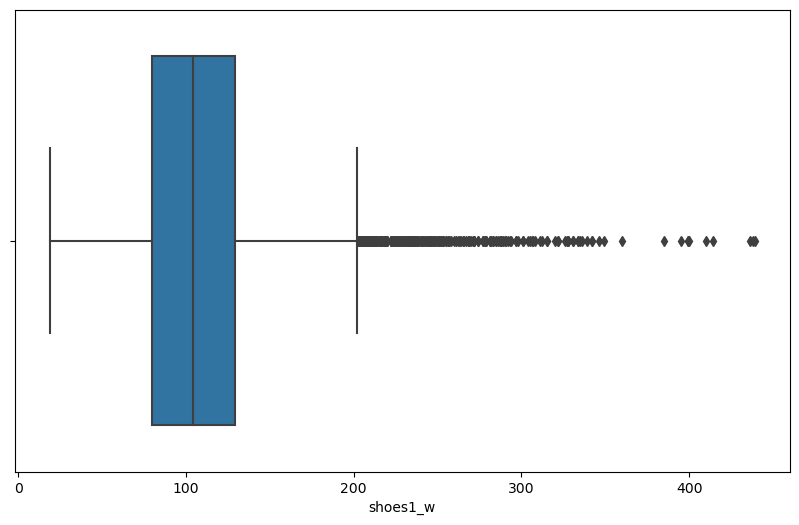

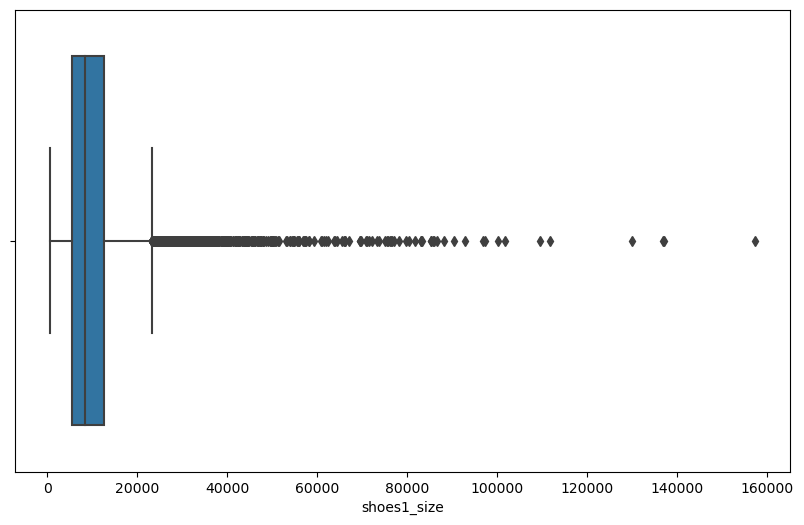

In [46]:
box_plot(woman, 'woman', 'shoes1_h')
box_plot(woman, 'woman', 'shoes1_w')
woman['shoes1_size'] = woman['shoes1_h'] * woman['shoes1_w']
box_plot(woman, 'woman', 'shoes1_size')

## 신발2

이상치 개수: 454
이상치 제거한 데이터의 평균값: 86.84459333705564
본래 데이터의 평균값: 92.11526785714285
이상치 개수: 307
이상치 제거한 데이터의 평균값: 101.58386119526301
본래 데이터의 평균값: 105.57723214285714
이상치 개수: 650
이상치 제거한 데이터의 평균값: 9035.097914691944
본래 데이터의 평균값: 10759.06625


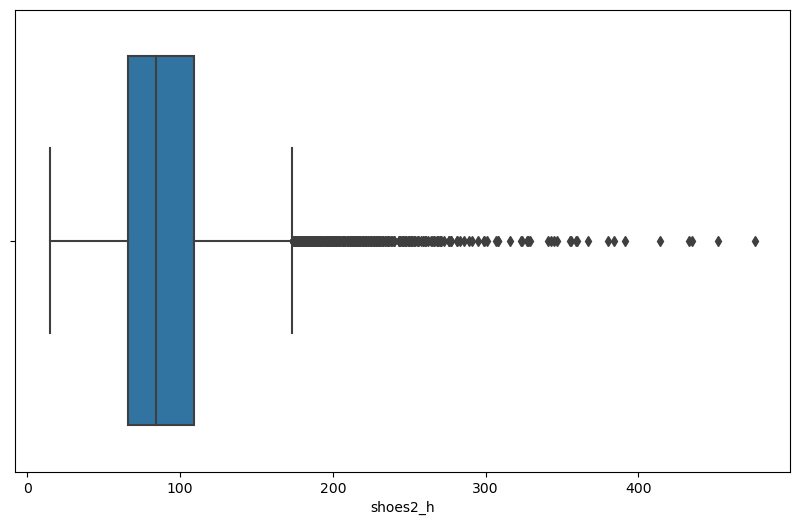

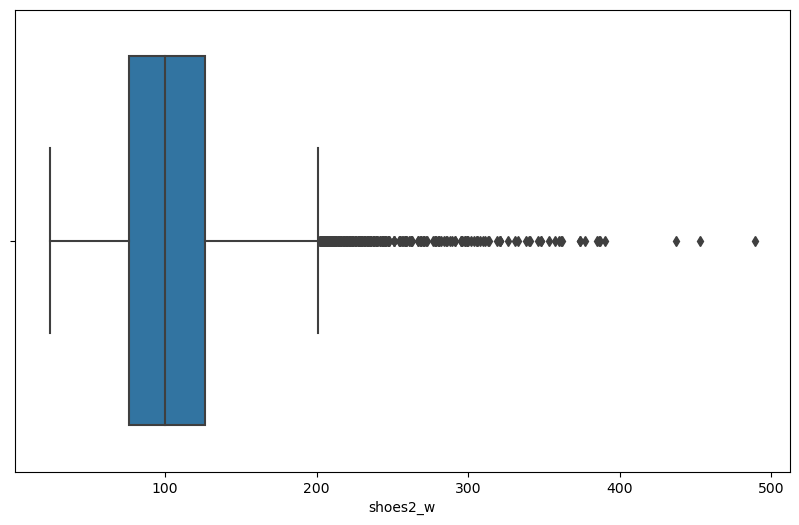

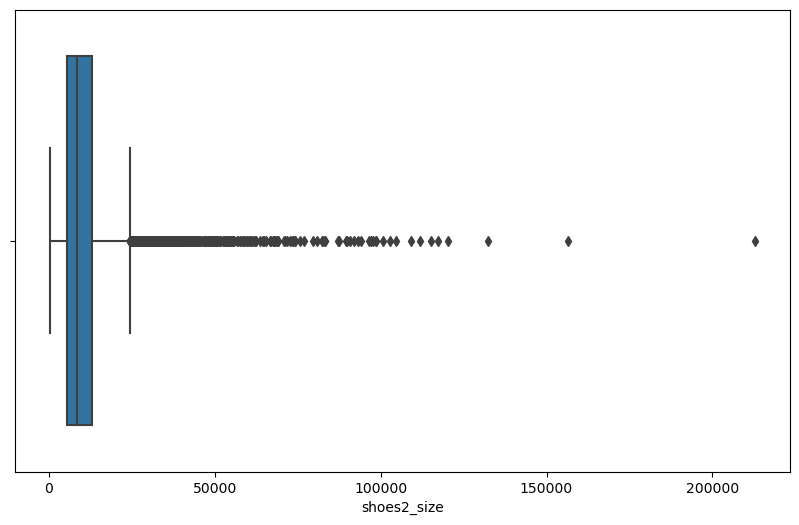

In [47]:
box_plot(woman, 'woman', 'shoes2_h')
box_plot(woman, 'woman', 'shoes2_w')
woman['shoes2_size'] = woman['shoes2_h'] * woman['shoes2_w']
box_plot(woman, 'woman', 'shoes2_size')

In [52]:
woman.columns

Index(['body_h', 'body_w', 'head_h', 'head_w', 'face_h', 'face_w', 'eye_h',
       'eye_w', 'nose_h', 'nose_w', 'mouth_h', 'mouth_w', 'ear_h', 'ear_w',
       'neck_h', 'neck_w', 'upper_body_h', 'upper_body_w', 'foot_h', 'foot_w',
       'leg_h', 'leg_w', 'shoes1_h', 'shoes1_w', 'shoes2_h', 'shoes2_w',
       'arm_h', 'arm_w', 'hand_h', 'hand_w', 'face_size', 'ear_size',
       'eye_size', 'nose_size', 'body_size', 'neck_size', 'arm_size',
       'hand_size', 'mouth_size', 'leg_size', 'foot_size', 'shoes1_size',
       'shoes2_size', 'upper_body_size'],
      dtype='object')

In [27]:
woman.describe()

,body_h,body_w,head_h,head_w,face_h,face_w,eye_h,eye_w,nose_h,nose_w,...,hand_w,face_size,ear_size,eye_size,nose_size,body_size,neck_size,arm_size,hand_size,mouth_size
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,...,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,1.120000e+04,11200.000000,11200.000000,11200.000000,11200.000000
mean,837.417589,454.058482,269.171250,278.259018,160.553393,277.153571,37.674911,42.806250,34.868661,24.571607,...,64.346696,51292.932857,2540.128304,1978.726786,1104.312232,4.052327e+05,3672.381518,29657.742232,4646.983839,3005.121339
std,219.598746,169.991328,102.247251,116.672624,68.849919,116.231371,20.581673,25.049047,20.922769,17.302642,...,26.031980,49193.767095,3161.125726,2489.855301,2142.030565,2.324360e+05,4027.513558,22908.682837,4183.743454,5659.918986
min,187.000000,110.000000,47.000000,60.000000,33.000000,60.000000,6.000000,4.000000,4.000000,3.000000,...,9.000000,2170.000000,143.000000,36.000000,12.000000,2.057000e+04,120.000000,476.000000,130.000000,56.000000
25%,675.000000,331.000000,198.000000,198.000000,113.000000,197.000000,23.000000,25.000000,21.000000,14.000000,...,46.000000,22826.000000,1089.000000,612.000000,320.000000,2.335530e+05,1512.000000,14756.000000,2116.000000,864.000000
50%,845.000000,426.000000,251.000000,253.000000,146.000000,252.000000,33.000000,38.000000,30.000000,21.000000,...,60.000000,36616.000000,1715.500000,1254.000000,609.000000,3.590825e+05,2537.000000,24309.500000,3588.000000,1652.000000
75%,1011.000000,547.000000,319.000000,332.000000,192.000000,331.000000,47.000000,55.000000,43.000000,30.000000,...,78.000000,62200.000000,2829.000000,2400.000000,1173.000000,5.292260e+05,4374.000000,38309.250000,5796.000000,3311.000000
max,1280.000000,1280.000000,941.000000,1124.000000,664.000000,1124.000000,214.000000,261.000000,286.000000,446.000000,...,224.000000,689792.000000,70224.000000,49068.000000,90092.000000,1.638400e+06,93744.000000,746280.000000,79834.000000,305800.000000


-----------------------
## 나무 통계량

-----------------------

In [53]:
tree.head()

,tree_h,tree_w,trunk_h,trunk_w,branch_h,branch_w,leaf_h,leaf_w,crown_h,crown_w,root_h,root_w
0,1206,931,527,394,383,633,105,75,640,925,184,693
1,756,468,367,228,223,297,119,48,389,462,80,174
2,1111,548,599,168,131,319,80,147,95,118,309,297
3,864,410,415,271,48,160,117,113,71,55,97,361
4,1261,922,834,556,51,75,69,37,307,319,174,591


In [54]:
tree['leaf_size'] = tree.leaf_h * tree.leaf_w
tree['branch_size'] = tree.branch_h * tree.branch_w
tree['trunk_size'] = tree.trunk_h * tree.trunk_w
tree['root_size'] = tree.root_h * tree.root_w
tree['tree_size'] = tree.tree_h * tree.tree_w
tree['crown_size'] = tree.crown_h * tree.crown_w

### 나무 전체

이상치 개수: 141
이상치 제거한 데이터의 평균값: 1040.068179763089
본래 데이터의 평균값: 1032.28875
이상치 개수: 0
이상치 제거한 데이터의 평균값: 708.2399107142858
본래 데이터의 평균값: 708.2399107142858
이상치 개수: 0
이상치 제거한 데이터의 평균값: 758141.3626785714
본래 데이터의 평균값: 758141.3626785714


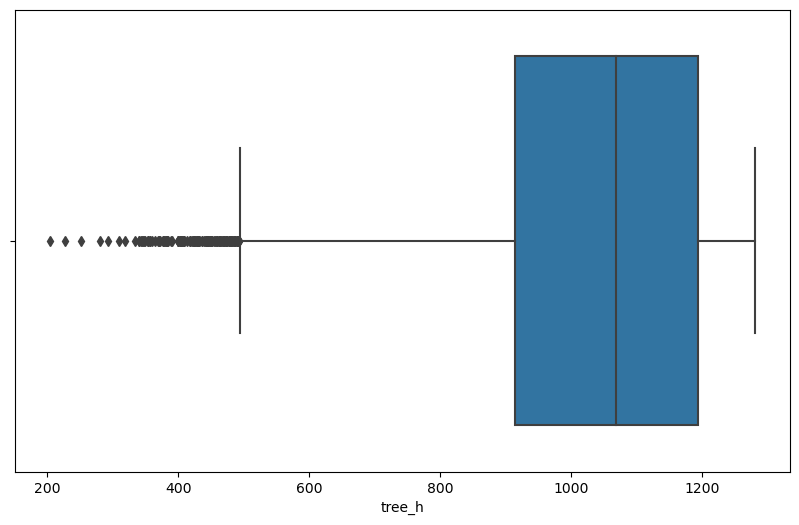

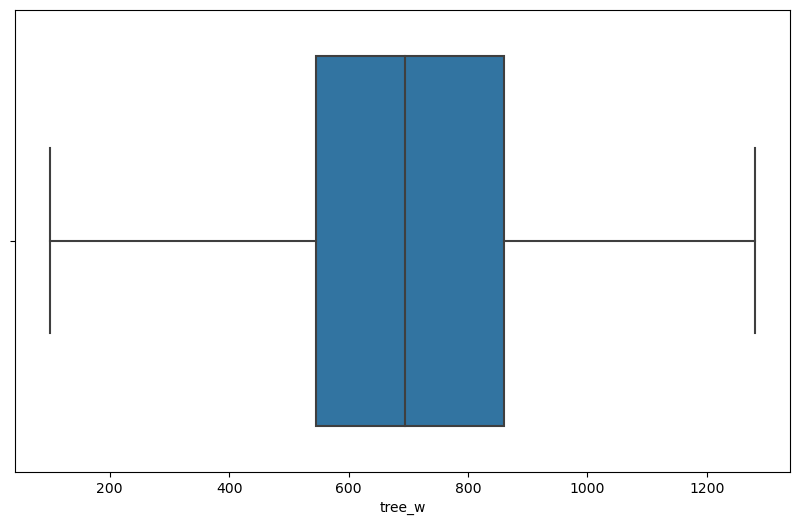

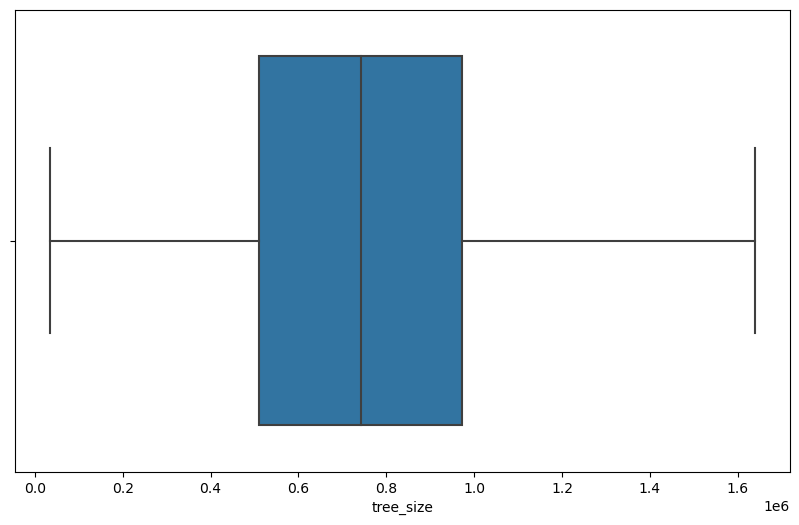

In [55]:
box_plot(tree, 'tree', 'tree_h')
box_plot(tree, 'tree', 'tree_w')
box_plot(tree, 'tree', 'tree_size')

### 잎

이상치 개수: 335
이상치 제거한 데이터의 평균값: 70.27758858720662
본래 데이터의 평균값: 73.49892857142858
이상치 개수: 400
이상치 제거한 데이터의 평균값: 56.631203703703704
본래 데이터의 평균값: 60.21776785714286
이상치 개수: 653
이상치 제거한 데이터의 평균값: 4072.66549729781
본래 데이터의 평균값: 4904.632589285714


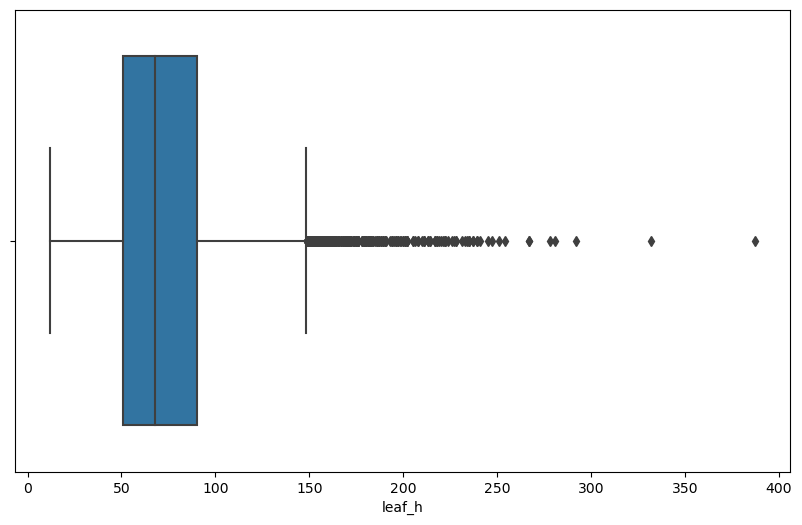

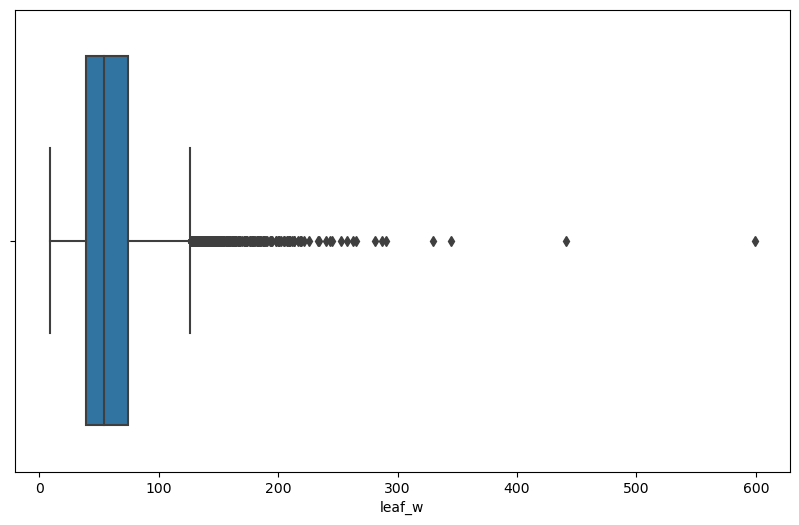

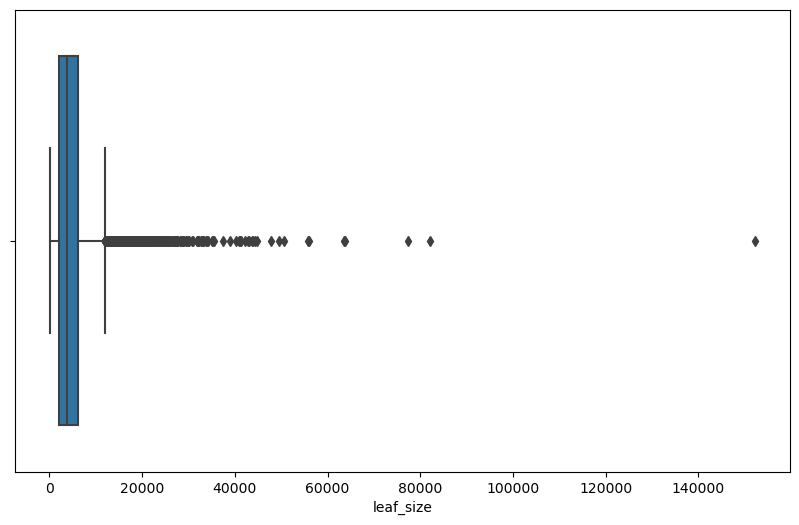

In [56]:
box_plot(tree, 'tree', 'leaf_h')
box_plot(tree, 'tree', 'leaf_w')
box_plot(tree, 'tree', 'leaf_size')

### 가지

이상치 개수: 170
이상치 제거한 데이터의 평균값: 191.17008159564824
본래 데이터의 평균값: 197.22696428571427
이상치 개수: 201
이상치 제거한 데이터의 평균값: 351.68942631148286
본래 데이터의 평균값: 363.70964285714285
이상치 개수: 626
이상치 제거한 데이터의 평균값: 72852.85918290146
본래 데이터의 평균값: 90219.60375


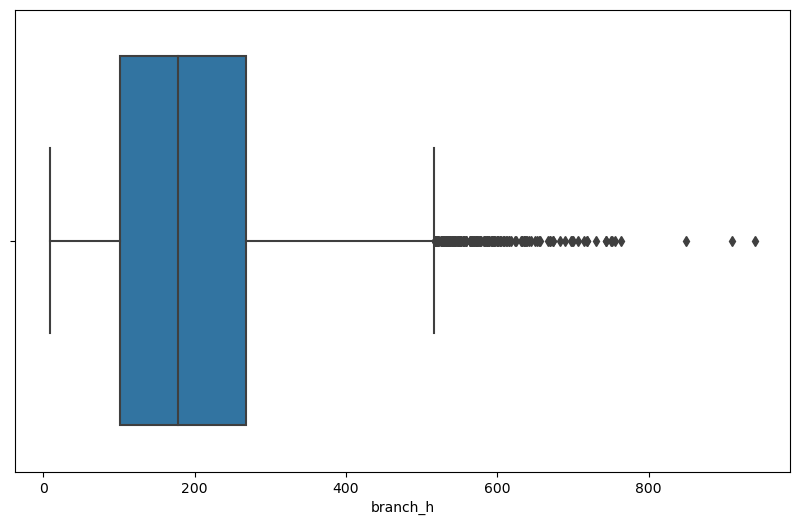

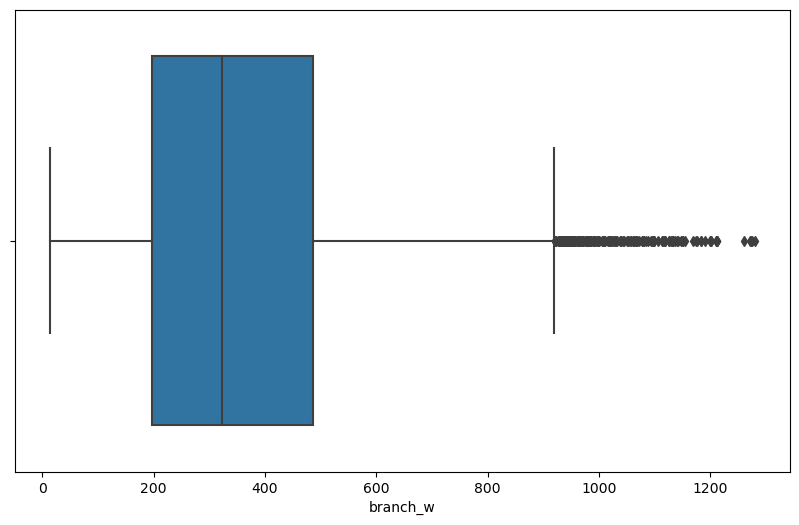

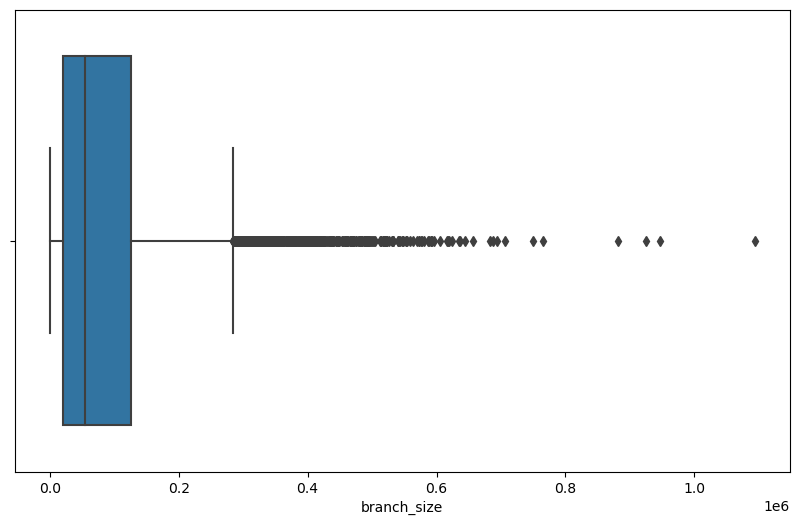

In [57]:
box_plot(tree, 'tree', 'branch_h')
box_plot(tree, 'tree', 'branch_w')
box_plot(tree, 'tree', 'branch_size')

### 줄기

이상치 개수: 55
이상치 제거한 데이터의 평균값: 517.406460296097
본래 데이터의 평균값: 519.6658928571428
이상치 개수: 222
이상치 제거한 데이터의 평균값: 283.4562761887411
본래 데이터의 평균값: 291.2001785714286
이상치 개수: 273
이상치 제거한 데이터의 평균값: 151090.17836551662
본래 데이터의 평균값: 158605.20267857143


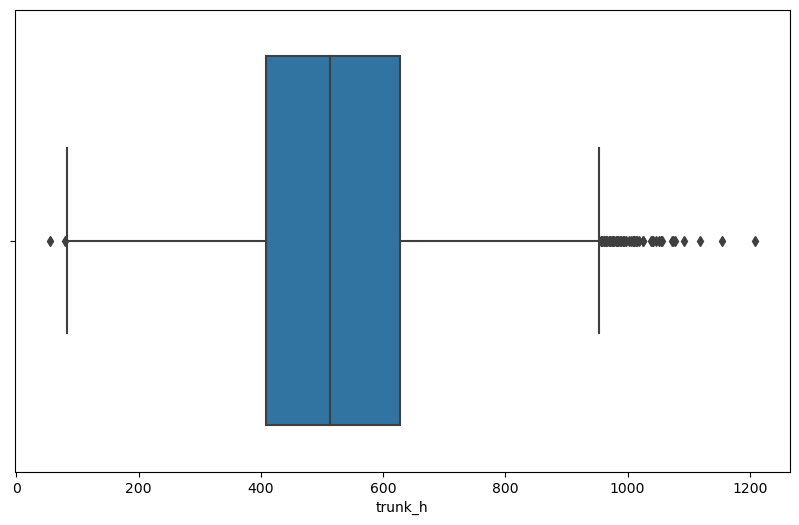

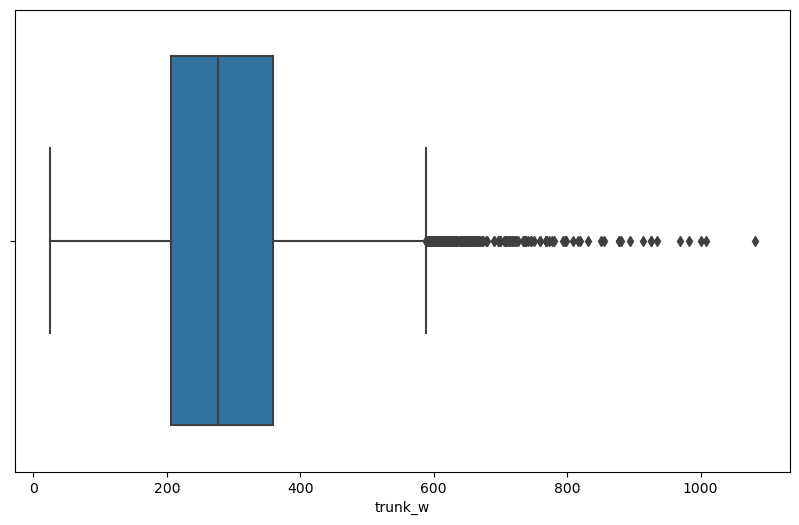

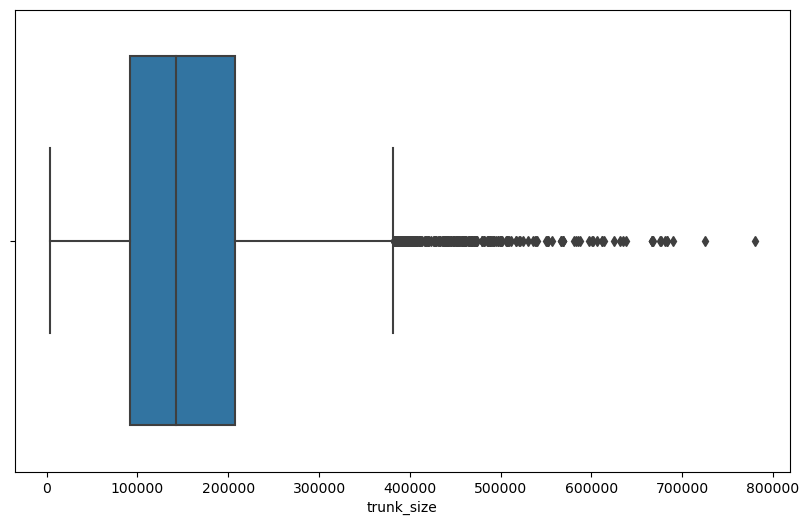

In [58]:
box_plot(tree, 'tree', 'trunk_h')
box_plot(tree, 'tree', 'trunk_w')
box_plot(tree, 'tree', 'trunk_size')

### 뿌리

이상치 개수: 308
이상치 제거한 데이터의 평균값: 157.7320969518913
본래 데이터의 평균값: 164.5849107142857
이상치 개수: 272
이상치 제거한 데이터의 평균값: 398.40757686676426
본래 데이터의 평균값: 413.555625
이상치 개수: 548
이상치 제거한 데이터의 평균값: 65502.19667668043
본래 데이터의 평균값: 75982.844375


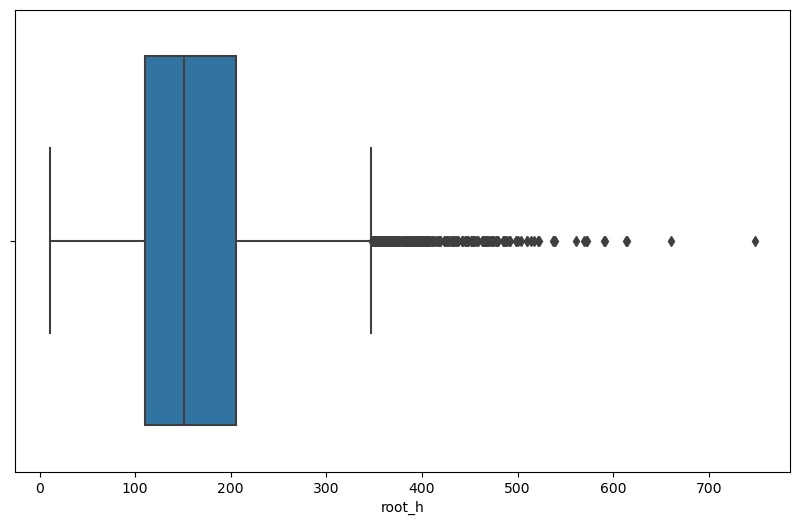

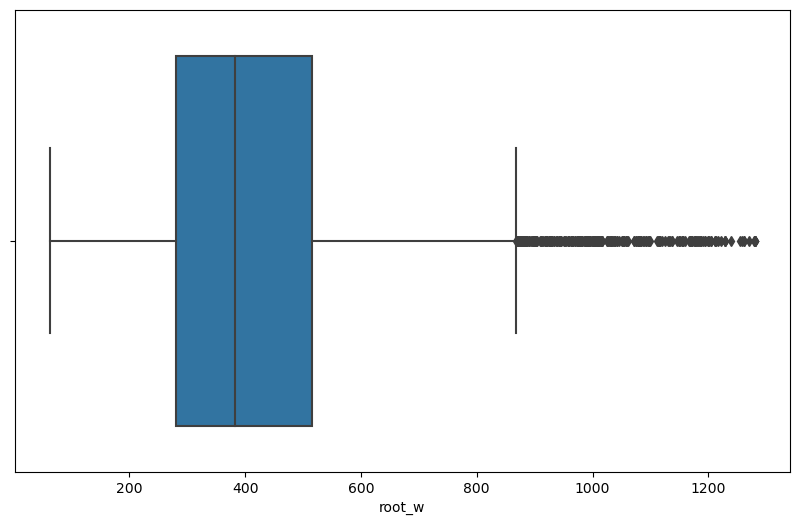

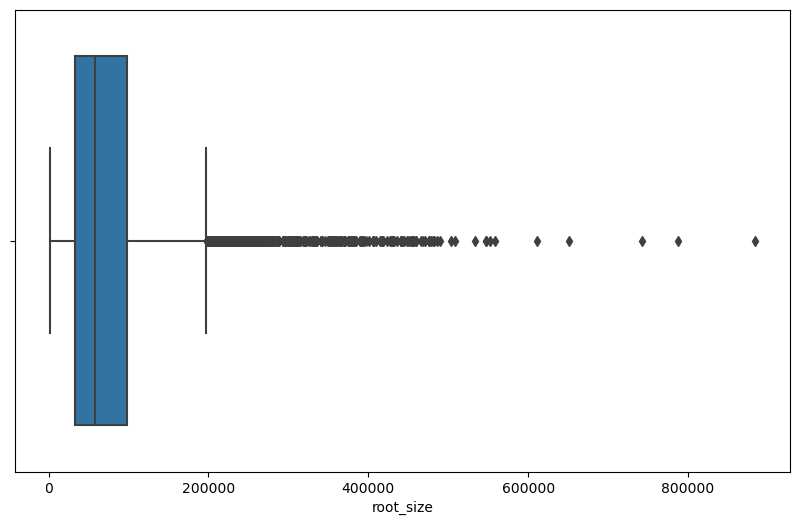

In [59]:
box_plot(tree, 'tree', 'root_h')
box_plot(tree, 'tree', 'root_w')
box_plot(tree, 'tree', 'root_size')

In [46]:
tree.head()

,tree_h,tree_w,trunk_h,trunk_w,branch_h,branch_w,leaf_h,leaf_w,crown_h,crown_w,root_h,root_w,leaf_size,branch_size,trunk_size,root_size,tree_size
0,1206,931,527,394,383,633,105,75,640,925,184,693,7875,242439,207638,127512,1122786
1,756,468,367,228,223,297,119,48,389,462,80,174,5712,66231,83676,13920,353808
2,1111,548,599,168,131,319,80,147,95,118,309,297,11760,41789,100632,91773,608828
3,864,410,415,271,48,160,117,113,71,55,97,361,13221,7680,112465,35017,354240
4,1261,922,834,556,51,75,69,37,307,319,174,591,2553,3825,463704,102834,1162642


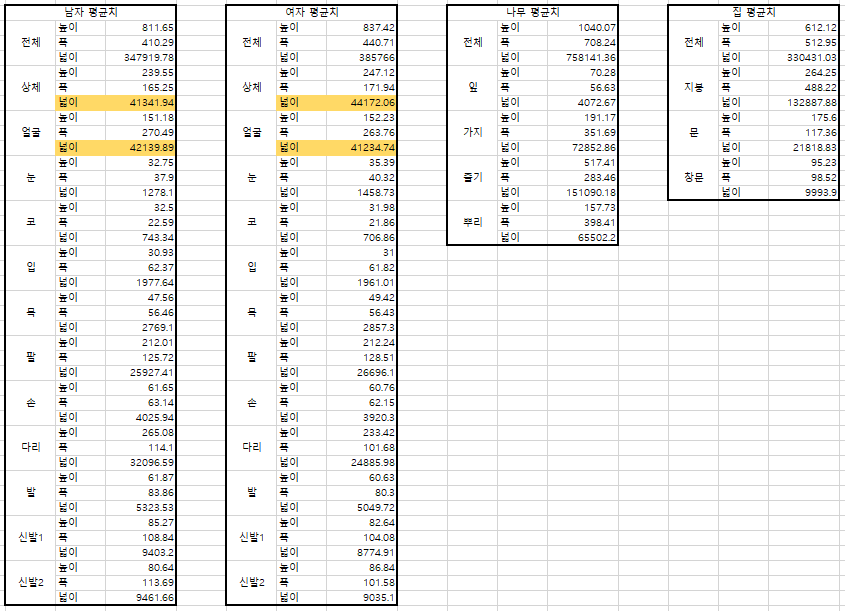